In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
# Import data from Travel Payouts and compiled airport codes
allprices_df=pd.read_csv('Output/AllPrices.csv')
domprices_df=allprices_df
airportcodes_df=pd.read_csv('Resources/airport-codes.csv')

In [3]:
# Drop any flights with 0 distance
allprices_df=allprices_df[allprices_df['Distance (Miles)']!=0]
# Normalize price by distance
allprices_df['Price per Mile']=allprices_df['Price (USD)']/allprices_df['Distance (Miles)']

C:\Users\OW93790\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [4]:
# Compile the coordinates of all unique airports in the Travel Payouts tickets
codes=[]
lats=[]
longs=[]
rows=len(allprices_df)
for i in range(rows):
    row=allprices_df.iloc[i,:]
    if row['Origin'] not in codes:
        code=row['Origin']
#         print(code)
#       Find coordinates of origin city, stored as "long, lat""
        try:
            coords=list(airportcodes_df[airportcodes_df['iata_code'] == code]['coordinates'])[0].split(', ')
            lat=coords[1]
            long=coords[0]
        except:
            lat=float('nan')
            long=float('nan')
        codes.append(code)
        lats.append(lat)
        longs.append(long)
    if row['Destination'] not in codes:
        code=row['Destination']
#         print(code)
#       Find coordinates of origin city, stored as "long, lat"
        try:
            coords=list(airportcodes_df[airportcodes_df['iata_code'] == code]['coordinates'])[0].split(', ')
            lat=coords[1]
            long=coords[0]
        except:
            lat=float('nan')
            long=float('nan')
        codes.append(code)
        lats.append(lat)
        longs.append(long)
coords_df=pd.DataFrame({'Airport Code':codes, 'Lat':lats, 'Long':longs})
coords_df

,Airport Code,Lat,Long
0,ATL,33.63669967651367,-84.4281005859375
1,ORL,NaN,NaN
2,BWI,39.17539978,-76.66829681
3,FLL,26.072599411010742,-80.15270233154297
4,DFW,32.89680099487305,-97.03800201416016
5,HOU,29.64539909,-95.27890015
6,MIA,25.79319953918457,-80.29060363769531
7,CHI,NaN,NaN
8,RDU,35.877601623535156,-78.7874984741211
9,BOS,42.36429977,-71.00520325


In [5]:
# Add latitudes and longitudes to ticket data
rows=len(allprices_df)
lats1=[]
longs1=[]
lats2=[]
longs2=[]
for i in range(rows):
    row=allprices_df.iloc[i,:]
#   Add coordinates of origin city
    origin=row['Origin']
    print('Ticket '+ str(i))
    print(origin)
    origincoords=coords_df[coords_df['Airport Code']==origin]
    lat1=list(origincoords['Lat'])[0]
    long1=list(origincoords['Long'])[0]
    lats1.append(float(lat1))
    longs1.append(float(long1))
#   Add coordinates of destination city
    destination=row['Destination']
    print(destination)
    destinationcoords=coords_df[coords_df['Airport Code']==destination]
    lat2=list(destinationcoords['Lat'])[0]
    long2=list(destinationcoords['Long'])[0]
    lats2.append(float(lat2))
    longs2.append(float(long2))
allprices_df['lat1']=lats1
allprices_df['long1']=longs1
allprices_df['lat2']=lats2
allprices_df['long2']=longs2
allprices_df=allprices_df.drop(columns=['Unnamed: 0'])

Ticket 0
ATL
ORL
Ticket 1
ATL
BWI
Ticket 2
ATL
FLL
Ticket 3
ATL
DFW
Ticket 4
ATL
HOU
Ticket 5
ATL
MIA
Ticket 6
ATL
CHI
Ticket 7
ATL
RDU
Ticket 8
ATL
BOS
Ticket 9
ATL
TPA
Ticket 10
ATL
NYC
Ticket 11
ATL
PIT
Ticket 12
ATL
BNA
Ticket 13
ATL
DEN
Ticket 14
ATL
MSY
Ticket 15
ATL
RIC
Ticket 16
ATL
DTT
Ticket 17
ATL
COS
Ticket 18
ATL
LAS
Ticket 19
ATL
HOT
Ticket 20
ATL
LAX
Ticket 21
ATL
JAX
Ticket 22
ATL
MEM
Ticket 23
ATL
SJU
Ticket 24
ATL
AUS
Ticket 25
ATL
SEA
Ticket 26
ATL
ISP
Ticket 27
ATL
SAN
Ticket 28
ATL
WAS
Ticket 29
ATL
JAN
Ticket 30
ATL
GUA
Ticket 31
ATL
CVG
Ticket 32
ATL
ILM
Ticket 33
ATL
MEX
Ticket 34
ATL
CUN
Ticket 35
ATL
SNA
Ticket 36
ATL
GEG
Ticket 37
ATL
SDQ
Ticket 38
ATL
PNS
Ticket 39
ATL
KIN
Ticket 40
ATL
GDL
Ticket 41
ATL
LEX
Ticket 42
ATL
MKE
Ticket 43
ATL
BOG
Ticket 44
ATL
PHX
Ticket 45
ATL
MSP
Ticket 46
ATL
PAR
Ticket 47
ATL
VSA
Ticket 48
ATL
HNL
Ticket 49
ATL
PHF
Ticket 50
ATL
SLP
Ticket 51
ATL
QRO
Ticket 52
ATL
PHL
Ticket 53
ATL
BCN
Ticket 54
ATL
MDE
Ticket 55
ATL
NCL
Ti

Ticket 479
DFW
BER
Ticket 480
DFW
MNL
Ticket 481
DFW
SYX
Ticket 482
DFW
DSI
Ticket 483
DFW
FRA
Ticket 484
DFW
REK
Ticket 485
DFW
DUB
Ticket 486
DFW
CAS
Ticket 487
DFW
BFS
Ticket 488
DFW
DXB
Ticket 489
DFW
FIH
Ticket 490
DFW
LOS
Ticket 491
DFW
CPT
Ticket 492
DFW
CEB
Ticket 493
DFW
MPH
Ticket 494
DFW
BOM
Ticket 495
DFW
TVY
Ticket 496
DEN
DFW
Ticket 497
DEN
LAS
Ticket 498
DEN
SLC
Ticket 499
DEN
HOU
Ticket 500
DEN
CDR
Ticket 501
DEN
MSP
Ticket 502
DEN
FLL
Ticket 503
DEN
LAX
Ticket 504
DEN
BWI
Ticket 505
DEN
AUS
Ticket 506
DEN
MKC
Ticket 507
DEN
SJC
Ticket 508
DEN
ICT
Ticket 509
DEN
SFO
Ticket 510
DEN
WAS
Ticket 511
DEN
SEA
Ticket 512
DEN
FSD
Ticket 513
DEN
TPA
Ticket 514
DEN
PHL
Ticket 515
DEN
ATL
Ticket 516
DEN
PHX
Ticket 517
DEN
RDU
Ticket 518
DEN
RIC
Ticket 519
DEN
OAK
Ticket 520
DEN
OKC
Ticket 521
DEN
MKE
Ticket 522
DEN
CHI
Ticket 523
DEN
BOS
Ticket 524
DEN
LAR
Ticket 525
DEN
AVP
Ticket 526
DEN
CMH
Ticket 527
DEN
CVG
Ticket 528
DEN
PIT
Ticket 529
DEN
HAR
Ticket 530
DEN
SAC
Ticket 531
D

Ticket 985
SFO
CAI
Ticket 986
SFO
OZH
Ticket 987
SFO
FOR
Ticket 988
SFO
SIN
Ticket 989
SFO
HYD
Ticket 990
SFO
BSB
Ticket 991
SFO
CPT
Ticket 992
SFO
BUE
Ticket 993
SFO
SYD
Ticket 994
SFO
RUH
Ticket 995
SFO
TAS
Ticket 996
SFO
BLR
Ticket 997
SFO
NAG
Ticket 998
SFO
SHJ
Ticket 999
SFO
SOQ
Ticket 1000
SFO
HOF
Ticket 1001
LAS
LAX
Ticket 1002
LAS
OAK
Ticket 1003
LAS
SFO
Ticket 1004
LAS
SAN
Ticket 1005
LAS
DEN
Ticket 1006
LAS
DFW
Ticket 1007
LAS
PDX
Ticket 1008
LAS
YYC
Ticket 1009
LAS
SEA
Ticket 1010
LAS
BIL
Ticket 1011
LAS
MEM
Ticket 1012
LAS
OMA
Ticket 1013
LAS
SAT
Ticket 1014
LAS
AUS
Ticket 1015
LAS
CHI
Ticket 1016
LAS
PHX
Ticket 1017
LAS
IND
Ticket 1018
LAS
HOU
Ticket 1019
LAS
MEX
Ticket 1020
LAS
SLC
Ticket 1021
LAS
RNO
Ticket 1022
LAS
PIT
Ticket 1023
LAS
BWI
Ticket 1024
LAS
CLE
Ticket 1025
LAS
ORL
Ticket 1026
LAS
MSY
Ticket 1027
LAS
DTT
Ticket 1028
LAS
NYC
Ticket 1029
LAS
STL
Ticket 1030
LAS
FLL
Ticket 1031
LAS
ABQ
Ticket 1032
LAS
YVR
Ticket 1033
LAS
CUN
Ticket 1034
LAS
YTO
Ticket 1035
LAS

SJU
Ticket 1441
EWR
TPA
Ticket 1442
EWR
SDQ
Ticket 1443
EWR
PAP
Ticket 1444
EWR
SRQ
Ticket 1445
EWR
MSY
Ticket 1446
EWR
SFO
Ticket 1447
EWR
KIN
Ticket 1448
EWR
ONT
Ticket 1449
EWR
MDE
Ticket 1450
EWR
MKC
Ticket 1451
EWR
YHZ
Ticket 1452
EWR
YVR
Ticket 1453
EWR
MEM
Ticket 1454
EWR
CHS
Ticket 1455
EWR
PHX
Ticket 1456
EWR
OAK
Ticket 1457
EWR
HAV
Ticket 1458
EWR
BOG
Ticket 1459
EWR
YQB
Ticket 1460
EWR
RIX
Ticket 1461
EWR
BNA
Ticket 1462
EWR
BOI
Ticket 1463
EWR
GNV
Ticket 1464
EWR
SBN
Ticket 1465
EWR
HAR
Ticket 1466
EWR
MEX
Ticket 1467
EWR
BCN
Ticket 1468
EWR
PHL
Ticket 1469
EWR
STI
Ticket 1470
EWR
SAL
Ticket 1471
EWR
AMS
Ticket 1472
EWR
GUA
Ticket 1473
EWR
PDX
Ticket 1474
EWR
SDF
Ticket 1475
EWR
DEN
Ticket 1476
EWR
MBJ
Ticket 1477
EWR
ELP
Ticket 1478
EWR
SJC
Ticket 1479
EWR
YYC
Ticket 1480
EWR
MAD
Ticket 1481
EWR
SOF
Ticket 1482
EWR
POS
Ticket 1483
EWR
BGI
Ticket 1484
EWR
NAS
Ticket 1485
EWR
AXM
Ticket 1486
EWR
ROM
Ticket 1487
EWR
MAN
Ticket 1488
EWR
PUJ
Ticket 1489
EWR
CLO
Ticket 1490
EWR


Ticket 1882
BOS
SJC
Ticket 1883
BOS
MSY
Ticket 1884
BOS
OAJ
Ticket 1885
BOS
SFO
Ticket 1886
BOS
ZSH
Ticket 1887
BOS
BNA
Ticket 1888
BOS
STI
Ticket 1889
BOS
DEN
Ticket 1890
BOS
CLT
Ticket 1891
BOS
BDL
Ticket 1892
BOS
PHX
Ticket 1893
BOS
SEA
Ticket 1894
BOS
HGR
Ticket 1895
BOS
MBJ
Ticket 1896
BOS
YYJ
Ticket 1897
BOS
LON
Ticket 1898
BOS
FKL
Ticket 1899
BOS
PAP
Ticket 1900
BOS
ORF
Ticket 1901
BOS
YXU
Ticket 1902
BOS
MGW
Ticket 1903
BOS
MHT
Ticket 1904
BOS
BCN
Ticket 1905
BOS
JST
Ticket 1906
BOS
AOO
Ticket 1907
BOS
AUA
Ticket 1908
BOS
BFD
Ticket 1909
BOS
FRA
Ticket 1910
BOS
DUJ
Ticket 1911
BOS
CID
Ticket 1912
BOS
LNS
Ticket 1913
BOS
SDQ
Ticket 1914
BOS
SOF
Ticket 1915
BOS
ISP
Ticket 1916
BOS
DFW
Ticket 1917
BOS
MUC
Ticket 1918
BOS
KGS
Ticket 1919
BOS
MKE
Ticket 1920
BOS
MIL
Ticket 1921
BOS
IST
Ticket 1922
BOS
SKG
Ticket 1923
BOS
LGB
Ticket 1924
BOS
MOW
Ticket 1925
BOS
HAR
Ticket 1926
BOS
SHA
Ticket 1927
BOS
CKG
Ticket 1928
BOS
ISB
Ticket 1929
BOS
PAR
Ticket 1930
BOS
SGN
Ticket 1931
BOS
HNL


Ticket 2333
BWI
IND
Ticket 2334
BWI
ORF
Ticket 2335
BWI
GSP
Ticket 2336
BWI
PHL
Ticket 2337
BWI
ROC
Ticket 2338
BWI
BDL
Ticket 2339
BWI
CLT
Ticket 2340
BWI
ALB
Ticket 2341
BWI
GRI
Ticket 2342
BWI
MIA
Ticket 2343
BWI
MSY
Ticket 2344
BWI
PBI
Ticket 2345
BWI
MEM
Ticket 2346
BWI
SAT
Ticket 2347
BWI
DAB
Ticket 2348
BWI
SWF
Ticket 2349
BWI
SAN
Ticket 2350
BWI
LBE
Ticket 2351
BWI
MKC
Ticket 2352
BWI
YOW
Ticket 2353
BWI
STL
Ticket 2354
BWI
LAN
Ticket 2355
BWI
PVD
Ticket 2356
BWI
PDX
Ticket 2357
BWI
SLC
Ticket 2358
BWI
BHM
Ticket 2359
BWI
PNS
Ticket 2360
BWI
CHS
Ticket 2361
BWI
SFO
Ticket 2362
BWI
COS
Ticket 2363
BWI
PAP
Ticket 2364
BWI
REK
Ticket 2365
BWI
SRQ
Ticket 2366
BWI
SEA
Ticket 2367
BWI
OAK
Ticket 2368
BWI
CKB
Ticket 2369
BWI
SAV
Ticket 2370
BWI
MBJ
Ticket 2371
BWI
TOL
Ticket 2372
BWI
WAS
Ticket 2373
BWI
SJC
Ticket 2374
BWI
OAJ
Ticket 2375
BWI
RIC
Ticket 2376
BWI
TVC
Ticket 2377
BWI
BGR
Ticket 2378
BWI
SBY
Ticket 2379
BWI
HSV
Ticket 2380
BWI
DUB
Ticket 2381
BWI
SCE
Ticket 2382
BWI
AVP


Ticket 2763
MDW
TPA
Ticket 2764
MDW
SFO
Ticket 2765
MDW
LAX
Ticket 2766
MDW
ATL
Ticket 2767
MDW
SEA
Ticket 2768
MDW
ISP
Ticket 2769
MDW
MSP
Ticket 2770
MDW
BHM
Ticket 2771
MDW
BNA
Ticket 2772
MDW
PHX
Ticket 2773
MDW
AUS
Ticket 2774
MDW
SLC
Ticket 2775
MDW
OAK
Ticket 2776
MDW
PNS
Ticket 2777
MDW
HRL
Ticket 2778
MDW
DTT
Ticket 2779
MDW
SJU
Ticket 2780
MDW
JAX
Ticket 2781
MDW
BDL
Ticket 2782
MDW
SNA
Ticket 2783
MDW
MEX
Ticket 2784
MDW
SJD
Ticket 2785
MDW
SDF
Ticket 2786
MDW
ONT
Ticket 2787
MDW
CLE
Ticket 2788
MDW
ZCL
Ticket 2789
MDW
EYW
Ticket 2790
MDW
HLN
Ticket 2791
MDW
PHL
Ticket 2792
MDW
MLM
Ticket 2793
MDW
LIT
Ticket 2794
MDW
GDL
Ticket 2795
MDW
DGO
Ticket 2796
MDW
JAN
Ticket 2797
MDW
LON
Ticket 2798
MDW
VLD
Ticket 2799
MDW
DAY
Ticket 2800
MDW
FMY
Ticket 2801
MDW
SAN
Ticket 2802
MDW
PVR
Ticket 2803
MDW
YVR
Ticket 2804
MDW
SAC
Ticket 2805
MDW
BQN
Ticket 2806
MDW
LEX
Ticket 2807
MDW
YQX
Ticket 2808
MDW
ZIH
Ticket 2809
MDW
IEV
Ticket 2810
MDW
NAS
Ticket 2811
MDW
FRA
Ticket 2812
MDW
HAR


Ticket 3238
OAK
FOR
Ticket 3239
OAK
BLR
Ticket 3240
OAK
HYD
Ticket 3241
OAK
BSB
Ticket 3242
OAK
SIN
Ticket 3243
OAK
SBZ
Ticket 3244
OAK
BKK
Ticket 3245
OAK
SVX
Ticket 3246
CLE
ORL
Ticket 3247
CLE
LAX
Ticket 3248
CLE
TPA
Ticket 3249
CLE
MYR
Ticket 3250
CLE
SAN
Ticket 3251
CLE
NYC
Ticket 3252
CLE
LAS
Ticket 3253
CLE
MIA
Ticket 3254
CLE
FLL
Ticket 3255
CLE
HOU
Ticket 3256
CLE
OAK
Ticket 3257
CLE
MSP
Ticket 3258
CLE
MSY
Ticket 3259
CLE
ISP
Ticket 3260
CLE
CLT
Ticket 3261
CLE
CHI
Ticket 3262
CLE
MEX
Ticket 3263
CLE
PHX
Ticket 3264
CLE
PIT
Ticket 3265
CLE
HNL
Ticket 3266
CLE
ONT
Ticket 3267
CLE
OGG
Ticket 3268
CLE
IST
Ticket 3269
CLE
REK
Ticket 3270
CLE
JHM
Ticket 3271
CLE
OVB
Ticket 3272
RDU
PIT
Ticket 3273
RDU
BWI
Ticket 3274
RDU
ORL
Ticket 3275
RDU
WAS
Ticket 3276
RDU
TPA
Ticket 3277
RDU
NYC
Ticket 3278
RDU
DEN
Ticket 3279
RDU
ATL
Ticket 3280
RDU
HAR
Ticket 3281
RDU
ISP
Ticket 3282
RDU
FLL
Ticket 3283
RDU
PHL
Ticket 3284
RDU
ROC
Ticket 3285
RDU
AVP
Ticket 3286
RDU
SEA
Ticket 3287
RDU
MBJ


Ticket 3731
PIT
TVC
Ticket 3732
PIT
ELP
Ticket 3733
PIT
LAN
Ticket 3734
PIT
HAR
Ticket 3735
PIT
BGR
Ticket 3736
PIT
SCE
Ticket 3737
PIT
CLE
Ticket 3738
PIT
MBJ
Ticket 3739
PIT
MCW
Ticket 3740
PIT
ROA
Ticket 3741
PIT
MEM
Ticket 3742
PIT
SWF
Ticket 3743
PIT
RIC
Ticket 3744
PIT
BCN
Ticket 3745
PIT
CMH
Ticket 3746
PIT
ILG
Ticket 3747
PIT
BTV
Ticket 3748
PIT
ERI
Ticket 3749
PIT
JAN
Ticket 3750
PIT
HNL
Ticket 3751
PIT
GCN
Ticket 3752
PIT
PRG
Ticket 3753
PIT
IEV
Ticket 3754
PIT
LFT
Ticket 3755
PIT
IST
Ticket 3756
PIT
MNL
Ticket 3757
PIT
MAA
Ticket 3758
PIT
PGH
Ticket 3759
PIT
DAC
Ticket 3760
PIT
BAL
Ticket 3761
PIT
TEB
Ticket 3762
SAT
DEN
Ticket 3763
SAT
COS
Ticket 3764
SAT
MEM
Ticket 3765
SAT
LAS
Ticket 3766
SAT
MTY
Ticket 3767
SAT
DFW
Ticket 3768
SAT
RIC
Ticket 3769
SAT
PDX
Ticket 3770
SAT
PIT
Ticket 3771
SAT
BWI
Ticket 3772
SAT
OKC
Ticket 3773
SAT
SLC
Ticket 3774
SAT
GDL
Ticket 3775
SAT
WAS
Ticket 3776
SAT
ONT
Ticket 3777
SAT
BDL
Ticket 3778
SAT
ACA
Ticket 3779
SAT
ABQ
Ticket 3780
SAT
SDQ


ATQ
Ticket 4146
ORD
CUE
Ticket 4147
ORD
SVX
Ticket 4148
ORD
CAS
Ticket 4149
ORD
DEL
Ticket 4150
ORD
SEL
Ticket 4151
ORD
MAA
Ticket 4152
ORD
WNP
Ticket 4153
ORD
LHE
Ticket 4154
ORD
TUG
Ticket 4155
ORD
ULN
Ticket 4156
ORD
TYO
Ticket 4157
ORD
JED
Ticket 4158
ORD
RIO
Ticket 4159
ORD
COK
Ticket 4160
ORD
LED
Ticket 4161
ORD
AMD
Ticket 4162
ORD
KRT
Ticket 4163
ORD
LOS
Ticket 4164
LAX
LAS
Ticket 4165
LAX
SFO
Ticket 4166
LAX
HOU
Ticket 4167
LAX
MSP
Ticket 4168
LAX
OAK
Ticket 4169
LAX
PIT
Ticket 4170
LAX
GDL
Ticket 4171
LAX
PHX
Ticket 4172
LAX
PDX
Ticket 4173
LAX
DFW
Ticket 4174
LAX
CHI
Ticket 4175
LAX
MEM
Ticket 4176
LAX
CLE
Ticket 4177
LAX
BWI
Ticket 4178
LAX
SAN
Ticket 4179
LAX
SJC
Ticket 4180
LAX
DTT
Ticket 4181
LAX
DEN
Ticket 4182
LAX
SEA
Ticket 4183
LAX
MSY
Ticket 4184
LAX
NYC
Ticket 4185
LAX
ELP
Ticket 4186
LAX
PHL
Ticket 4187
LAX
MFR
Ticket 4188
LAX
RNO
Ticket 4189
LAX
AUS
Ticket 4190
LAX
ORL
Ticket 4191
LAX
BOS
Ticket 4192
LAX
FLL
Ticket 4193
LAX
BOI
Ticket 4194
LAX
MEX
Ticket 4195
LAX


Ticket 4645
JFK
ORN
Ticket 4646
JFK
MSQ
Ticket 4647
JFK
JAN
Ticket 4648
JFK
LIM
Ticket 4649
JFK
LED
Ticket 4650
JFK
BEG
Ticket 4651
JFK
PTY
Ticket 4652
JFK
SLC
Ticket 4653
JFK
BOI
Ticket 4654
JFK
VRA
Ticket 4655
JFK
TBS
Ticket 4656
JFK
PTP
Ticket 4657
JFK
SZZ
Ticket 4658
JFK
SAL
Ticket 4659
JFK
AYT
Ticket 4660
JFK
SVX
Ticket 4661
JFK
HRK
Ticket 4662
JFK
DXB
Ticket 4663
JFK
KIV
Ticket 4664
JFK
AXM
Ticket 4665
JFK
HNL
Ticket 4666
JFK
LWO
Ticket 4667
JFK
EVN
Ticket 4668
JFK
MKC
Ticket 4669
JFK
DKR
Ticket 4670
JFK
ODS
Ticket 4671
JFK
BEY
Ticket 4672
JFK
GOJ
Ticket 4673
JFK
SAT
Ticket 4674
JFK
KRR
Ticket 4675
JFK
KZN
Ticket 4676
JFK
MCX
Ticket 4677
JFK
STW
Ticket 4678
JFK
ALA
Ticket 4679
JFK
CGN
Ticket 4680
JFK
TAS
Ticket 4681
JFK
BKK
Ticket 4682
JFK
BUS
Ticket 4683
JFK
SHA
Ticket 4684
JFK
BOM
Ticket 4685
JFK
SGN
Ticket 4686
JFK
SIN
Ticket 4687
JFK
DEL
Ticket 4688
JFK
SIT
Ticket 4689
JFK
INN
Ticket 4690
JFK
CEK
Ticket 4691
JFK
MHK
Ticket 4692
JFK
CAI
Ticket 4693
JFK
VLC
Ticket 4694
JFK
LIH


MIA
MEX
Ticket 5145
MIA
OMA
Ticket 5146
MIA
EYW
Ticket 5147
MIA
MSP
Ticket 5148
MIA
DFW
Ticket 5149
MIA
BIM
Ticket 5150
MIA
LAX
Ticket 5151
MIA
LAS
Ticket 5152
MIA
SAN
Ticket 5153
MIA
ATL
Ticket 5154
MIA
SFO
Ticket 5155
MIA
PNS
Ticket 5156
MIA
BDA
Ticket 5157
MIA
EGE
Ticket 5158
MIA
PVD
Ticket 5159
MIA
RDU
Ticket 5160
MIA
LNS
Ticket 5161
MIA
CTG
Ticket 5162
MIA
MAR
Ticket 5163
MIA
CCS
Ticket 5164
MIA
AOO
Ticket 5165
MIA
CVG
Ticket 5166
MIA
FKL
Ticket 5167
MIA
HGR
Ticket 5168
MIA
MGW
Ticket 5169
MIA
DUJ
Ticket 5170
MIA
GRI
Ticket 5171
MIA
SJD
Ticket 5172
MIA
HAR
Ticket 5173
MIA
GDL
Ticket 5174
MIA
ABQ
Ticket 5175
MIA
SEA
Ticket 5176
MIA
BUF
Ticket 5177
MIA
LON
Ticket 5178
MIA
BFD
Ticket 5179
MIA
PHX
Ticket 5180
MIA
SJC
Ticket 5181
MIA
GYE
Ticket 5182
MIA
JAN
Ticket 5183
MIA
MYR
Ticket 5184
MIA
NCE
Ticket 5185
MIA
LIM
Ticket 5186
MIA
BLA
Ticket 5187
MIA
STL
Ticket 5188
MIA
RIX
Ticket 5189
MIA
MTY
Ticket 5190
MIA
CPH
Ticket 5191
MIA
ROM
Ticket 5192
MIA
CLO
Ticket 5193
MIA
CUR
Ticket 5194


VIX
Ticket 5563
EWR
COO
Ticket 5564
EWR
LCA
Ticket 5565
EWR
TJU
Ticket 5566
EWR
HRK
Ticket 5567
EWR
SYD
Ticket 5568
EWR
TSE
Ticket 5569
EWR
AKL
Ticket 5570
EWR
NAN
Ticket 5571
EWR
BOB
Ticket 5572
EWR
RMI
Ticket 5573
DTW
FLL
Ticket 5574
DTW
BWI
Ticket 5575
DTW
MYR
Ticket 5576
DTW
MSY
Ticket 5577
DTW
NYC
Ticket 5578
DTW
DEN
Ticket 5579
DTW
AGS
Ticket 5580
DTW
LAS
Ticket 5581
DTW
SAN
Ticket 5582
DTW
STL
Ticket 5583
DTW
RIC
Ticket 5584
DTW
ATL
Ticket 5585
DTW
YMQ
Ticket 5586
DTW
OAK
Ticket 5587
DTW
PIT
Ticket 5588
DTW
HVN
Ticket 5589
DTW
LAX
Ticket 5590
DTW
BOS
Ticket 5591
DTW
PHX
Ticket 5592
DTW
RNO
Ticket 5593
DTW
CHI
Ticket 5594
DTW
FMY
Ticket 5595
DTW
GNV
Ticket 5596
DTW
MIA
Ticket 5597
DTW
HOU
Ticket 5598
DTW
PGD
Ticket 5599
DTW
CHS
Ticket 5600
DTW
ISP
Ticket 5601
DTW
SFO
Ticket 5602
DTW
BEG
Ticket 5603
DTW
AMS
Ticket 5604
DTW
TUS
Ticket 5605
DTW
MOW
Ticket 5606
DTW
LOS
Ticket 5607
DTW
BKK
Ticket 5608
DTW
HYD
Ticket 5609
DTW
EBL
Ticket 5610
DTW
SYD
Ticket 5611
MSP
CLE
Ticket 5612
MSP


SBY
Ticket 5977
LGA
SRQ
Ticket 5978
LGA
VRA
Ticket 5979
LGA
SNU
Ticket 5980
LGA
JAN
Ticket 5981
LGA
GDL
Ticket 5982
LGA
BOI
Ticket 5983
LGA
SLC
Ticket 5984
LGA
SAL
Ticket 5985
LGA
BCN
Ticket 5986
LGA
PAR
Ticket 5987
LGA
PTY
Ticket 5988
LGA
LIR
Ticket 5989
LGA
DUB
Ticket 5990
LGA
GEO
Ticket 5991
LGA
BER
Ticket 5992
LGA
ATH
Ticket 5993
LGA
ACK
Ticket 5994
LGA
MAD
Ticket 5995
LGA
PVR
Ticket 5996
LGA
MIL
Ticket 5997
LGA
HEL
Ticket 5998
LGA
SOF
Ticket 5999
LGA
AMS
Ticket 6000
LGA
BRU
Ticket 6001
LGA
LIM
Ticket 6002
LGA
VCE
Ticket 6003
LGA
MTY
Ticket 6004
LGA
FRA
Ticket 6005
LGA
WAW
Ticket 6006
LGA
MUC
Ticket 6007
LGA
HNL
Ticket 6008
LGA
LED
Ticket 6009
LGA
IEV
Ticket 6010
LGA
ROM
Ticket 6011
LGA
OSL
Ticket 6012
LGA
DUS
Ticket 6013
LGA
POZ
Ticket 6014
LGA
ANU
Ticket 6015
LGA
ZRH
Ticket 6016
LGA
KIV
Ticket 6017
LGA
IST
Ticket 6018
LGA
GIB
Ticket 6019
LGA
PRG
Ticket 6020
LGA
PTP
Ticket 6021
LGA
PSO
Ticket 6022
LGA
MHK
Ticket 6023
LGA
LIS
Ticket 6024
LGA
ORN
Ticket 6025
LGA
STR
Ticket 6026
LGA


Ticket 6392
FLL
CLT
Ticket 6393
FLL
TUL
Ticket 6394
FLL
CCS
Ticket 6395
FLL
GRI
Ticket 6396
FLL
GYE
Ticket 6397
FLL
MYR
Ticket 6398
FLL
DOM
Ticket 6399
FLL
GND
Ticket 6400
FLL
ALB
Ticket 6401
FLL
HAR
Ticket 6402
FLL
PHX
Ticket 6403
FLL
ABQ
Ticket 6404
FLL
STL
Ticket 6405
FLL
OSL
Ticket 6406
FLL
JAN
Ticket 6407
FLL
SJC
Ticket 6408
FLL
AMS
Ticket 6409
FLL
SAC
Ticket 6410
FLL
CPH
Ticket 6411
FLL
ROM
Ticket 6412
FLL
SJD
Ticket 6413
FLL
MOW
Ticket 6414
FLL
SCL
Ticket 6415
FLL
LIM
Ticket 6416
FLL
MTY
Ticket 6417
FLL
IST
Ticket 6418
FLL
CUR
Ticket 6419
FLL
HNL
Ticket 6420
FLL
ASE
Ticket 6421
FLL
ANU
Ticket 6422
FLL
HAM
Ticket 6423
FLL
LED
Ticket 6424
FLL
SBA
Ticket 6425
FLL
COK
Ticket 6426
FLL
TLV
Ticket 6427
FLL
PBI
Ticket 6428
FLL
EGE
Ticket 6429
FLL
MAD
Ticket 6430
FLL
MSQ
Ticket 6431
FLL
MRV
Ticket 6432
FLL
SAO
Ticket 6433
FLL
SSA
Ticket 6434
FLL
IEV
Ticket 6435
FLL
GVA
Ticket 6436
FLL
BJS
Ticket 6437
FLL
GDL
Ticket 6438
FLL
AKL
Ticket 6439
FLL
NCE
Ticket 6440
FLL
ROV
Ticket 6441
FLL
MAR


Ticket 6807
TPA
ATL
Ticket 6808
TPA
PIT
Ticket 6809
TPA
GSP
Ticket 6810
TPA
CHI
Ticket 6811
TPA
BNA
Ticket 6812
TPA
FLL
Ticket 6813
TPA
CLE
Ticket 6814
TPA
TYS
Ticket 6815
TPA
BWI
Ticket 6816
TPA
RDU
Ticket 6817
TPA
LAS
Ticket 6818
TPA
MSY
Ticket 6819
TPA
MSP
Ticket 6820
TPA
EYW
Ticket 6821
TPA
DEN
Ticket 6822
TPA
CHA
Ticket 6823
TPA
YTO
Ticket 6824
TPA
WAS
Ticket 6825
TPA
MIA
Ticket 6826
TPA
GCK
Ticket 6827
TPA
FWA
Ticket 6828
TPA
NYC
Ticket 6829
TPA
YOW
Ticket 6830
TPA
SAN
Ticket 6831
TPA
PHL
Ticket 6832
TPA
LAX
Ticket 6833
TPA
SJO
Ticket 6834
TPA
BOS
Ticket 6835
TPA
DFW
Ticket 6836
TPA
FKL
Ticket 6837
TPA
BFD
Ticket 6838
TPA
DUJ
Ticket 6839
TPA
AOO
Ticket 6840
TPA
MGW
Ticket 6841
TPA
LNS
Ticket 6842
TPA
SJU
Ticket 6843
TPA
FNT
Ticket 6844
TPA
STL
Ticket 6845
TPA
SAC
Ticket 6846
TPA
HGR
Ticket 6847
TPA
STT
Ticket 6848
TPA
HPN
Ticket 6849
TPA
PHX
Ticket 6850
TPA
ISP
Ticket 6851
TPA
HAR
Ticket 6852
TPA
ICT
Ticket 6853
TPA
UIO
Ticket 6854
TPA
SJD
Ticket 6855
TPA
GPT
Ticket 6856
TPA
TOL


MOB
Ticket 7262
BNA
DSM
Ticket 7263
BNA
CLT
Ticket 7264
BNA
BUF
Ticket 7265
BNA
AVP
Ticket 7266
BNA
PSP
Ticket 7267
BNA
SEA
Ticket 7268
BNA
TYS
Ticket 7269
BNA
EGE
Ticket 7270
BNA
TUL
Ticket 7271
BNA
BKK
Ticket 7272
BNA
SYX
Ticket 7273
BNA
PGH
Ticket 7274
BNA
SYD
Ticket 7275
SMF
GDL
Ticket 7276
SMF
SEA
Ticket 7277
SMF
LAX
Ticket 7278
SMF
LAS
Ticket 7279
SMF
WAS
Ticket 7280
SMF
NYC
Ticket 7281
SMF
ATL
Ticket 7282
SMF
AUS
Ticket 7283
SMF
PHL
Ticket 7284
SMF
SJU
Ticket 7285
SMF
BWI
Ticket 7286
SMF
MSY
Ticket 7287
SMF
PIT
Ticket 7288
SMF
SNA
Ticket 7289
SMF
AGS
Ticket 7290
SMF
ORL
Ticket 7291
SMF
DFW
Ticket 7292
SMF
TIJ
Ticket 7293
SMF
RIC
Ticket 7294
SMF
TUL
Ticket 7295
SMF
SDF
Ticket 7296
SMF
ROV
Ticket 7297
SMF
ACV
Ticket 7298
SMF
CAS
Ticket 7299
SMF
DUB
Ticket 7300
HOU
CHI
Ticket 7301
HOU
NYC
Ticket 7302
HOU
LAX
Ticket 7303
HOU
ORL
Ticket 7304
HOU
FLL
Ticket 7305
HOU
LAS
Ticket 7306
HOU
DEN
Ticket 7307
HOU
MEX
Ticket 7308
HOU
MTY
Ticket 7309
HOU
DFW
Ticket 7310
HOU
CUN
Ticket 7311
HOU


Ticket 7767
DAL
GPT
Ticket 7768
DAL
SGF
Ticket 7769
DAL
LON
Ticket 7770
DAL
MTY
Ticket 7771
DAL
CUN
Ticket 7772
DAL
OAK
Ticket 7773
DAL
PDL
Ticket 7774
DAL
CKB
Ticket 7775
DAL
MOW
Ticket 7776
DAL
MLB
Ticket 7777
DAL
IEV
Ticket 7778
DAL
FYV
Ticket 7779
DAL
KIN
Ticket 7780
DAL
HYD
Ticket 7781
DAL
KTM
Ticket 7782
DAL
SYX
Ticket 7783
DAL
BOM
Ticket 7784
DAL
DXB
Ticket 7785
DAL
TNG
Ticket 7786
DAL
DNK
Ticket 7787
DAL
MUC
Ticket 7788
DAL
DAR
Ticket 7789
DAL
CTU
Ticket 7790
DAL
JED
Ticket 7791
DAL
BSR
Ticket 7792
DAL
TPE
Ticket 7793
DAL
NBO
Ticket 7794
IND
FLL
Ticket 7795
IND
LAS
Ticket 7796
IND
ORL
Ticket 7797
IND
CHI
Ticket 7798
IND
BOS
Ticket 7799
IND
FMY
Ticket 7800
IND
HOU
Ticket 7801
IND
DFW
Ticket 7802
IND
TPA
Ticket 7803
IND
PHX
Ticket 7804
IND
BLI
Ticket 7805
IND
SAV
Ticket 7806
IND
MLB
Ticket 7807
IND
PDX
Ticket 7808
IND
PGD
Ticket 7809
IND
ABE
Ticket 7810
IND
PNS
Ticket 7811
IND
AGP
Ticket 7812
IND
FAR
Ticket 7813
IND
DEN
Ticket 7814
IND
LFT
Ticket 7815
IND
GUA
Ticket 7816
IND
TYO


Ticket 8307
DEN
FRA
Ticket 8308
DEN
SUX
Ticket 8309
DEN
ZCL
Ticket 8310
DEN
SHA
Ticket 8311
DEN
PPT
Ticket 8312
DEN
ISP
Ticket 8313
DEN
MSQ
Ticket 8314
DEN
DPL
Ticket 8315
JFK
WAS
Ticket 8316
JFK
BUF
Ticket 8317
JFK
BOS
Ticket 8318
JFK
BWI
Ticket 8319
JFK
CHI
Ticket 8320
JFK
YMQ
Ticket 8321
JFK
DFW
Ticket 8322
JFK
MIA
Ticket 8323
JFK
ORL
Ticket 8324
JFK
FLL
Ticket 8325
JFK
ATL
Ticket 8326
JFK
PIT
Ticket 8327
JFK
YTO
Ticket 8328
JFK
CAE
Ticket 8329
JFK
DTT
Ticket 8330
JFK
LEX
Ticket 8331
JFK
LAS
Ticket 8332
JFK
MEX
Ticket 8333
JFK
CMH
Ticket 8334
JFK
PWM
Ticket 8335
JFK
CLT
Ticket 8336
JFK
SJU
Ticket 8337
JFK
HGR
Ticket 8338
JFK
GCM
Ticket 8339
JFK
SFO
Ticket 8340
JFK
DUJ
Ticket 8341
JFK
MGW
Ticket 8342
JFK
LNS
Ticket 8343
JFK
AOO
Ticket 8344
JFK
JAX
Ticket 8345
JFK
YVR
Ticket 8346
JFK
DEN
Ticket 8347
JFK
LAX
Ticket 8348
JFK
BQN
Ticket 8349
JFK
LIT
Ticket 8350
JFK
PHL
Ticket 8351
JFK
PBI
Ticket 8352
JFK
SAC
Ticket 8353
JFK
DAY
Ticket 8354
JFK
SRQ
Ticket 8355
JFK
SEA
Ticket 8356
JFK
MSY


PHX
BWI
Ticket 8807
PHX
SJC
Ticket 8808
PHX
CAE
Ticket 8809
PHX
SAC
Ticket 8810
PHX
CZM
Ticket 8811
PHX
ISP
Ticket 8812
PHX
BTV
Ticket 8813
PHX
TRI
Ticket 8814
PHX
PUJ
Ticket 8815
PHX
LON
Ticket 8816
PHX
PVR
Ticket 8817
PHX
MNL
Ticket 8818
PHX
DUB
Ticket 8819
PHX
SKB
Ticket 8820
PHX
GFK
Ticket 8821
PHX
OKA
Ticket 8822
CLT
AUS
Ticket 8823
CLT
CVG
Ticket 8824
CLT
WAS
Ticket 8825
CLT
BWI
Ticket 8826
CLT
CLE
Ticket 8827
CLT
NYC
Ticket 8828
CLT
PIT
Ticket 8829
CLT
CHI
Ticket 8830
CLT
ORL
Ticket 8831
CLT
PDX
Ticket 8832
CLT
LNS
Ticket 8833
CLT
HOU
Ticket 8834
CLT
LAS
Ticket 8835
CLT
JST
Ticket 8836
CLT
HGR
Ticket 8837
CLT
TPA
Ticket 8838
CLT
MBJ
Ticket 8839
CLT
FLL
Ticket 8840
CLT
DUJ
Ticket 8841
CLT
MGW
Ticket 8842
CLT
FKL
Ticket 8843
CLT
BFD
Ticket 8844
CLT
AOO
Ticket 8845
CLT
PHX
Ticket 8846
CLT
ICT
Ticket 8847
CLT
AVL
Ticket 8848
CLT
AVP
Ticket 8849
CLT
SJO
Ticket 8850
CLT
ISP
Ticket 8851
CLT
PBI
Ticket 8852
CLT
HAR
Ticket 8853
CLT
MGA
Ticket 8854
CLT
CUN
Ticket 8855
CLT
CSL
Ticket 8856


Ticket 9306
MSP
FMY
Ticket 9307
MSP
LAX
Ticket 9308
MSP
PHL
Ticket 9309
MSP
HVN
Ticket 9310
MSP
CHI
Ticket 9311
MSP
BNA
Ticket 9312
MSP
HOU
Ticket 9313
MSP
MEX
Ticket 9314
MSP
ISP
Ticket 9315
MSP
SJU
Ticket 9316
MSP
SAT
Ticket 9317
MSP
SBN
Ticket 9318
MSP
SDQ
Ticket 9319
MSP
ATW
Ticket 9320
MSP
BDL
Ticket 9321
MSP
GJT
Ticket 9322
MSP
CSL
Ticket 9323
MSP
MOB
Ticket 9324
MSP
DAB
Ticket 9325
MSP
KOA
Ticket 9326
MSP
QRO
Ticket 9327
MSP
BRU
Ticket 9328
MSP
DLH
Ticket 9329
MSP
RIX
Ticket 9330
MSP
LIS
Ticket 9331
MSP
BRO
Ticket 9332
MSP
CAN
Ticket 9333
MSP
ABJ
Ticket 9334
MSP
CUZ
Ticket 9335
MSP
NBO
Ticket 9336
MSP
MLW
Ticket 9337
SEA
LAS
Ticket 9338
SEA
RDM
Ticket 9339
SEA
BOI
Ticket 9340
SEA
SJC
Ticket 9341
SEA
YVR
Ticket 9342
SEA
DEN
Ticket 9343
SEA
LAX
Ticket 9344
SEA
STL
Ticket 9345
SEA
PHX
Ticket 9346
SEA
NYC
Ticket 9347
SEA
ANC
Ticket 9348
SEA
AUS
Ticket 9349
SEA
FLL
Ticket 9350
SEA
ONT
Ticket 9351
SEA
SAC
Ticket 9352
SEA
AVP
Ticket 9353
SEA
ATL
Ticket 9354
SEA
RDU
Ticket 9355
SEA
MRY


IAD
FNT
Ticket 9806
IAD
CSL
Ticket 9807
IAD
MOW
Ticket 9808
IAD
KOA
Ticket 9809
IAD
ROM
Ticket 9810
IAD
SIN
Ticket 9811
IAD
DXB
Ticket 9812
IAD
CAI
Ticket 9813
IAD
FRO
Ticket 9814
IAD
LIH
Ticket 9815
IAD
FOC
Ticket 9816
IAD
SVX
Ticket 9817
IAD
MAA
Ticket 9818
IAD
ULN
Ticket 9819
IAD
HYD
Ticket 9820
IAD
TYO
Ticket 9821
IAD
TLV
Ticket 9822
IAD
DEL
Ticket 9823
IAD
JED
Ticket 9824
IAD
LHE
Ticket 9825
IAD
HRG
Ticket 9826
IAD
ALG
Ticket 9827
IAD
SHJ
Ticket 9828
IAD
CBR
Ticket 9829
IAD
BAL
Ticket 9830
IAD
AMD
Ticket 9831
IAD
PGH
Ticket 9832
IAD
JST
Ticket 9833
IAD
AOO
Ticket 9834
IAD
LNS
Ticket 9835
BWI
PIT
Ticket 9836
BWI
VPS
Ticket 9837
BWI
ATL
Ticket 9838
BWI
DEN
Ticket 9839
BWI
FLL
Ticket 9840
BWI
ORL
Ticket 9841
BWI
HOU
Ticket 9842
BWI
DFW
Ticket 9843
BWI
TPA
Ticket 9844
BWI
RDU
Ticket 9845
BWI
MSP
Ticket 9846
BWI
FMY
Ticket 9847
BWI
NYC
Ticket 9848
BWI
LAS
Ticket 9849
BWI
LAX
Ticket 9850
BWI
CLE
Ticket 9851
BWI
CAK
Ticket 9852
BWI
DAY
Ticket 9853
BWI
CLT
Ticket 9854
BWI
GSO
Ticket 9855


QRO
Ticket 10251
MDW
PHX
Ticket 10252
MDW
ABQ
Ticket 10253
MDW
DTT
Ticket 10254
MDW
SNA
Ticket 10255
MDW
YMQ
Ticket 10256
MDW
GDL
Ticket 10257
MDW
CJS
Ticket 10258
MDW
PIT
Ticket 10259
MDW
STI
Ticket 10260
MDW
GSO
Ticket 10261
MDW
SJC
Ticket 10262
MDW
MLM
Ticket 10263
MDW
FMY
Ticket 10264
MDW
LON
Ticket 10265
MDW
JAN
Ticket 10266
MDW
GUA
Ticket 10267
MDW
AUA
Ticket 10268
MDW
SYR
Ticket 10269
MDW
RIC
Ticket 10270
MDW
HOU
Ticket 10271
MDW
HAR
Ticket 10272
MDW
SAC
Ticket 10273
MDW
PUJ
Ticket 10274
MDW
ROM
Ticket 10275
MDW
AMS
Ticket 10276
MDW
MTY
Ticket 10277
MDW
BCN
Ticket 10278
MDW
ANC
Ticket 10279
MDW
VER
Ticket 10280
MDW
YVR
Ticket 10281
MDW
MAN
Ticket 10282
MDW
MUC
Ticket 10283
MDW
MLA
Ticket 10284
MDW
CEB
Ticket 10285
MDW
BEG
Ticket 10286
MDW
MNL
Ticket 10287
MDW
KWI
Ticket 10288
MDW
DEL
Ticket 10289
MDW
ZRH
Ticket 10290
MDW
SKG
Ticket 10291
MDW
MOW
Ticket 10292
MDW
IEV
Ticket 10293
MDW
DXB
Ticket 10294
MDW
CAI
Ticket 10295
MDW
DPS
Ticket 10296
MDW
HNL
Ticket 10297
MDW
TYO
Ticket 10

Ticket 10804
HOU
CUN
Ticket 10805
HOU
DFW
Ticket 10806
HOU
JAX
Ticket 10807
HOU
SAN
Ticket 10808
HOU
BWI
Ticket 10809
HOU
SAL
Ticket 10810
HOU
PIT
Ticket 10811
HOU
GEG
Ticket 10812
HOU
PHL
Ticket 10813
HOU
PDX
Ticket 10814
HOU
MSY
Ticket 10815
HOU
MEM
Ticket 10816
HOU
CHI
Ticket 10817
HOU
GDL
Ticket 10818
HOU
MEX
Ticket 10819
HOU
SLC
Ticket 10820
HOU
EAT
Ticket 10821
HOU
PVR
Ticket 10822
HOU
DTT
Ticket 10823
HOU
WAS
Ticket 10824
HOU
ABQ
Ticket 10825
HOU
EYW
Ticket 10826
HOU
MBJ
Ticket 10827
HOU
ISP
Ticket 10828
HOU
GPT
Ticket 10829
HOU
IND
Ticket 10830
HOU
ROC
Ticket 10831
HOU
HAV
Ticket 10832
HOU
POS
Ticket 10833
HOU
SJC
Ticket 10834
HOU
JST
Ticket 10835
HOU
DUJ
Ticket 10836
HOU
MGW
Ticket 10837
HOU
HGR
Ticket 10838
HOU
AOO
Ticket 10839
HOU
BHM
Ticket 10840
HOU
BTR
Ticket 10841
HOU
LON
Ticket 10842
HOU
LNS
Ticket 10843
HOU
CMW
Ticket 10844
HOU
ELP
Ticket 10845
HOU
PRG
Ticket 10846
HOU
HSV
Ticket 10847
HOU
BFS
Ticket 10848
HOU
SDQ
Ticket 10849
HOU
ORK
Ticket 10850
HOU
GLA
Ticket 10851


C:\Users\OW93790\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\OW93790\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\OW93790\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [6]:
allprices_df

,Origin,Destination,Purchase Time,Distance (Miles),Departure Date,Price (USD),Class,Purchase Gate,Price per Mile,lat1,long1,lat2,long2
0,ATL,ORL,2018-10-01T18:46:04,402,2018-10-30,23.50,0,Kiwi.com,0.058458,33.636700,-84.428101,NaN,NaN
1,ATL,BWI,2018-10-02T15:48:55,577,2018-10-23,28.97,0,OneTravel,0.050208,33.636700,-84.428101,39.175400,-76.668297
2,ATL,FLL,2018-10-01T23:19:24,585,2018-10-09,28.97,0,OneTravel,0.049521,33.636700,-84.428101,26.072599,-80.152702
3,ATL,DFW,2018-10-01T16:08:11,718,2018-10-24,48.65,0,CompassFlights,0.067758,33.636700,-84.428101,32.896801,-97.038002
4,ATL,HOU,2018-10-02T22:09:02,702,2018-10-09,51.99,0,JustFly,0.074060,33.636700,-84.428101,29.645399,-95.278900
5,ATL,MIA,2018-10-01T13:16:48,604,2018-10-18,54.21,0,OneTravel,0.089752,33.636700,-84.428101,25.793200,-80.290604
6,ATL,CHI,2018-10-02T01:42:33,589,2018-10-25,56.18,0,JustFly,0.095382,33.636700,-84.428101,NaN,NaN
7,ATL,RDU,2018-10-02T20:50:17,349,2019-01-03,56.76,0,FlightNetwork,0.162636,33.636700,-84.428101,35.877602,-78.787498
8,ATL,BOS,2018-10-01T23:33:11,937,2018-10-28,61.09,0,CompassFlights,0.065197,33.636700,-84.428101,42.364300,-71.005203
9,ATL,TPA,2018-10-03T00:14:18,417,2018-10-12,61.41,0,FlightNetwork,0.147266,33.636700,-84.428101,27.975500,-82.533203


In [7]:
# Add bearing in radians to determine flight direction
# Drop flights where coordinates are not available
coordprices=allprices_df.dropna(axis='rows',how='any')
rows=len(coordprices)
rises=[]
runs=[]
bearings=[]
directions=[]
for i in range(rows):
    row=coordprices.iloc[i,:]
    rise=row['lat2']-row['lat1']
    rises.append(rise)
    run=row['long2']-row['long1']
#   Correct for longitude jump over Atlantic Ocean
    if run > 180:
        run=run - 360
    elif run < -180:
        run=run + 360
    runs.append(run)
    bearing=((math.pi/2 - math.atan2(rise,run))%(math.pi*2)*180/math.pi)
    bearings.append(bearing)
#   Convert Bearing into Cardinal Direction
    if bearing<=22.5 or bearing>=337.5:
        direction='N'
    elif bearing<67.5:
        direction='NE'
    elif bearing<=112.5:
        direction='E'
    elif bearing<157.5:
        direction='SE'
    elif bearing<=202.5:
        direction='S'
    elif bearing<247.5:
        direction='SW'
    elif bearing<=292.5:
        direction='W'
    else:
        direction='NW'
    directions.append(direction)
coordprices['Bearing']=bearings
coordprices['Direction']=directions

C:\Users\OW93790\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\OW93790\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
coordprices

,Origin,Destination,Purchase Time,Distance (Miles),Departure Date,Price (USD),Class,Purchase Gate,Price per Mile,lat1,long1,lat2,long2,Bearing,Direction
1,ATL,BWI,2018-10-02T15:48:55,577,2018-10-23,28.97,0,OneTravel,0.050208,33.636700,-84.428101,39.175400,-76.668297,54.481966,NE
2,ATL,FLL,2018-10-01T23:19:24,585,2018-10-09,28.97,0,OneTravel,0.049521,33.636700,-84.428101,26.072599,-80.152702,150.523897,SE
3,ATL,DFW,2018-10-01T16:08:11,718,2018-10-24,48.65,0,CompassFlights,0.067758,33.636700,-84.428101,32.896801,-97.038002,266.641963,W
4,ATL,HOU,2018-10-02T22:09:02,702,2018-10-09,51.99,0,JustFly,0.074060,33.636700,-84.428101,29.645399,-95.278900,249.804727,W
5,ATL,MIA,2018-10-01T13:16:48,604,2018-10-18,54.21,0,OneTravel,0.089752,33.636700,-84.428101,25.793200,-80.290604,152.188064,SE
7,ATL,RDU,2018-10-02T20:50:17,349,2019-01-03,56.76,0,FlightNetwork,0.162636,33.636700,-84.428101,35.877602,-78.787498,68.333034,E
8,ATL,BOS,2018-10-01T23:33:11,937,2018-10-28,61.09,0,CompassFlights,0.065197,33.636700,-84.428101,42.364300,-71.005203,56.967981,NE
9,ATL,TPA,2018-10-03T00:14:18,417,2018-10-12,61.41,0,FlightNetwork,0.147266,33.636700,-84.428101,27.975500,-82.533203,161.493751,S
11,ATL,PIT,2018-10-01T18:38:03,522,2018-10-11,68.01,0,Kiwi.com,0.130287,33.636700,-84.428101,40.491501,-80.232903,31.466996,NE
12,ATL,BNA,2018-10-02T01:54:02,209,2018-12-30,70.47,0,MyHolidays,0.337177,33.636700,-84.428101,36.124500,-86.678200,317.872133,NW


In [9]:
# Group data by directions
directiongroup=coordprices.groupby('Direction')
compassindex=['N','NE','E','SE','S','SW','W','NW']
priceavgs=directiongroup.mean()
pricesems=directiongroup.sem()
priceavgs=priceavgs.reindex(compassindex)
pricesems=pricesems.reindex(compassindex)
priceavgs

,Distance (Miles),Price (USD),Class,Price per Mile,lat1,long1,lat2,long2,Bearing
Direction,,,,,,,,,
N,725.427441,158.431425,0.0,0.397452,31.052121,-87.843963,41.368297,-87.556505,148.209610
NE,824.169355,197.353452,0.0,0.773627,32.901991,-91.845161,40.822094,-81.149164,50.465930
E,3983.497612,407.233397,0.0,0.170230,37.001802,-95.385561,38.122025,-14.901761,89.045005
SE,2019.004776,283.170420,0.0,0.207128,37.182227,-97.441892,18.216259,-73.627738,132.594122
S,1461.148289,206.742193,0.0,0.200662,38.960679,-82.838028,18.330204,-81.972416,178.649946
SW,1739.691729,241.454173,0.0,0.231344,38.669084,-83.732224,21.507865,-70.049639,225.322920
W,3188.509434,308.528302,0.0,0.208406,37.124652,-87.260785,32.762218,-54.196290,268.026120
NW,997.923077,227.866995,0.0,0.795176,31.079835,-87.268831,40.761177,-100.288728,309.693185


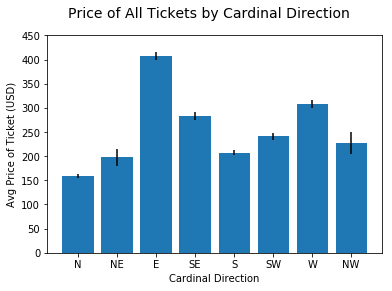

In [39]:
# Visualize ticket cost average
coords=range(8)

plt.bar(range(8),priceavgs['Price (USD)'],tick_label=compassindex,yerr=pricesems['Price (USD)'])
plt.ylabel('Avg Price of Ticket (USD)')
plt.ylim([0,450])
plt.xlabel('Cardinal Direction')
plt.suptitle('Price of All Tickets by Cardinal Direction', fontsize=14)

plt.savefig('Figures/Avg Price by Direction.png')

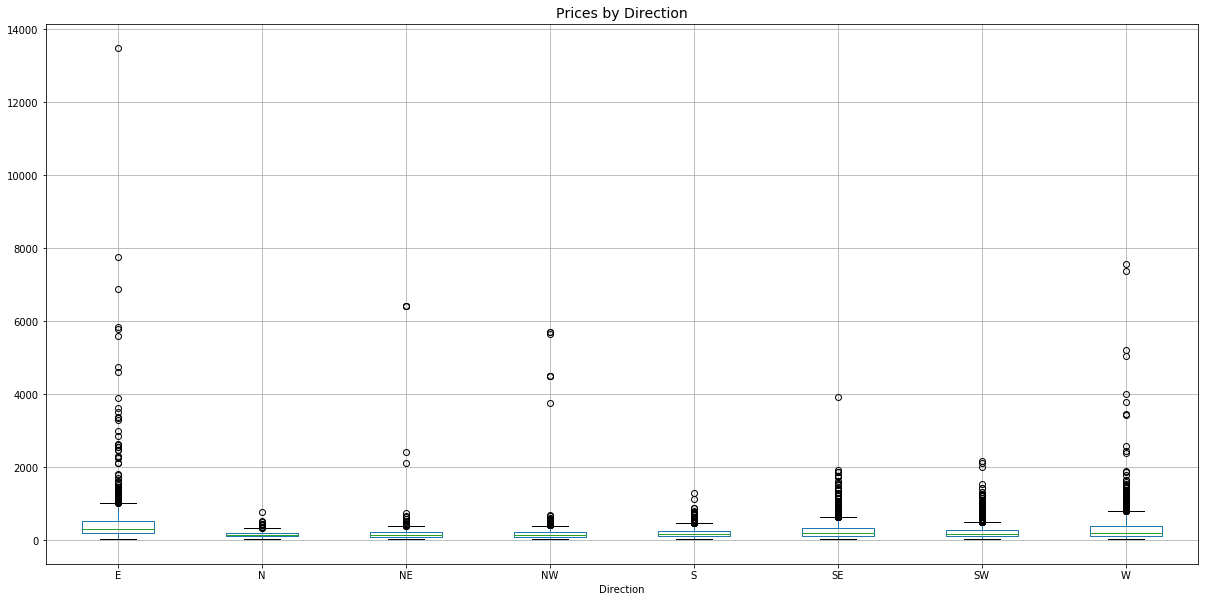

In [42]:
coordprices.boxplot('Price (USD)', by='Direction',figsize=(20,10))
plt.title('Prices by Direction',fontsize=14)
plt.suptitle("")

plt.savefig('Figures/All Prices by direction Boxplot.png')

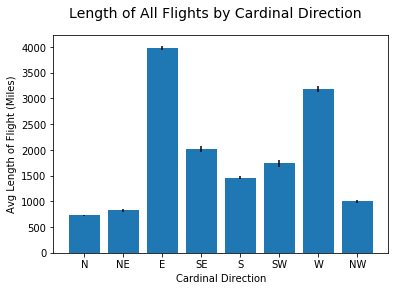

In [12]:
# Visualize Length of Flight by Direction
coords=range(8)

plt.bar(range(8),priceavgs['Distance (Miles)'],tick_label=compassindex,yerr=pricesems['Distance (Miles)'])
plt.ylabel('Avg Length of Flight (Miles)')
plt.xlabel('Cardinal Direction')
plt.suptitle('Length of All Flights by Cardinal Direction', fontsize=14)

plt.savefig('Figures/Avg Flight Length by Direction.png')

In [13]:
maxlength=coordprices['Distance (Miles)'].max()
coordprices[coordprices['Distance (Miles)']==maxlength]

,Origin,Destination,Purchase Time,Distance (Miles),Departure Date,Price (USD),Class,Purchase Gate,Price per Mile,lat1,long1,lat2,long2,Bearing,Direction
8958,MIA,DPS,2018-10-06T20:47:34,10899,2018-12-21,939.32,0,CheapTickets24.com,0.086184,25.7932,-80.290604,-8.74817,115.167,258.144401,W


In [14]:
maxprice=coordprices['Price (USD)'].max()
coordprices[coordprices['Price (USD)']==maxprice]

,Origin,Destination,Purchase Time,Distance (Miles),Departure Date,Price (USD),Class,Purchase Gate,Price per Mile,lat1,long1,lat2,long2,Bearing,Direction
4949,SFO,CBG,2018-10-03T16:29:28,5339,2018-12-17,13480.18,0,Justairticket,2.524851,37.618999,-122.375,52.205002,0.175,83.212539,E


In [15]:
# Trim coordinatedata to domestic flights
domairports_df=airportcodes_df[airportcodes_df['iso_country']=='US']
domairports=list(domairports_df['iata_code'].dropna())
domcoords_df=coords_df
rows=len(coords_df)
for i in range(rows):
    row=domcoords_df.iloc[i,:]
    if row['Airport Code'] not in domairports:
        row['Lat']=float('nan')
        row['Long']=float('nan')
domcoords_df

,Airport Code,Lat,Long
0,ATL,33.63669967651367,-84.4281005859375
1,ORL,NaN,NaN
2,BWI,39.17539978,-76.66829681
3,FLL,26.072599411010742,-80.15270233154297
4,DFW,32.89680099487305,-97.03800201416016
5,HOU,29.64539909,-95.27890015
6,MIA,25.79319953918457,-80.29060363769531
7,CHI,NaN,NaN
8,RDU,35.877601623535156,-78.7874984741211
9,BOS,42.36429977,-71.00520325


In [16]:
# Add latitudes and longitudes to deomestic ticket data
rows=len(domprices_df)
lats1=[]
longs1=[]
lats2=[]
longs2=[]
for i in range(rows):
    row=domprices_df.iloc[i,:]
#   Add coordinates of origin city
    origin=row['Origin']
    print('Ticket '+ str(i))
    print(origin)
    origincoords=domcoords_df[domcoords_df['Airport Code']==origin]
    lat1=list(origincoords['Lat'])[0]
    long1=list(origincoords['Long'])[0]
    lats1.append(float(lat1))
    longs1.append(float(long1))
#   Add coordinates of destination city
    destination=row['Destination']
    print(destination)
    destinationcoords=domcoords_df[domcoords_df['Airport Code']==destination]
    lat2=list(destinationcoords['Lat'])[0]
    long2=list(destinationcoords['Long'])[0]
    lats2.append(float(lat2))
    longs2.append(float(long2))
domprices_df['lat1']=lats1
domprices_df['long1']=longs1
domprices_df['lat2']=lats2
domprices_df['long2']=longs2
domprices_df=domprices_df.drop(columns=['Unnamed: 0'])

Ticket 0
ATL
ORL
Ticket 1
ATL
BWI
Ticket 2
ATL
FLL
Ticket 3
ATL
DFW
Ticket 4
ATL
HOU
Ticket 5
ATL
MIA
Ticket 6
ATL
CHI
Ticket 7
ATL
RDU
Ticket 8
ATL
BOS
Ticket 9
ATL
TPA
Ticket 10
ATL
NYC
Ticket 11
ATL
PIT
Ticket 12
ATL
BNA
Ticket 13
ATL
DEN
Ticket 14
ATL
MSY
Ticket 15
ATL
RIC
Ticket 16
ATL
DTT
Ticket 17
ATL
COS
Ticket 18
ATL
LAS
Ticket 19
ATL
HOT
Ticket 20
ATL
LAX
Ticket 21
ATL
JAX
Ticket 22
ATL
MEM
Ticket 23
ATL
SJU
Ticket 24
ATL
AUS
Ticket 25
ATL
SEA
Ticket 26
ATL
ISP
Ticket 27
ATL
SAN
Ticket 28
ATL
WAS
Ticket 29
ATL
JAN
Ticket 30
ATL
GUA
Ticket 31
ATL
CVG
Ticket 32
ATL
ILM
Ticket 33
ATL
MEX
Ticket 34
ATL
CUN
Ticket 35
ATL
SNA
Ticket 36
ATL
GEG
Ticket 37
ATL
SDQ
Ticket 38
ATL
PNS
Ticket 39
ATL
KIN
Ticket 40
ATL
GDL
Ticket 41
ATL
LEX
Ticket 42
ATL
MKE
Ticket 43
ATL
BOG
Ticket 44
ATL
PHX
Ticket 45
ATL
MSP
Ticket 46
ATL
PAR
Ticket 47
ATL
VSA
Ticket 48
ATL
HNL
Ticket 49
ATL
PHF
Ticket 50
ATL
SLP
Ticket 51
ATL
QRO
Ticket 52
ATL
PHL
Ticket 53
ATL
BCN
Ticket 54
ATL
MDE
Ticket 55
ATL
NCL
Ti

Ticket 476
DFW
CKB
Ticket 477
DFW
BKK
Ticket 478
DFW
MOW
Ticket 479
DFW
BER
Ticket 480
DFW
MNL
Ticket 481
DFW
SYX
Ticket 482
DFW
DSI
Ticket 483
DFW
FRA
Ticket 484
DFW
REK
Ticket 485
DFW
DUB
Ticket 486
DFW
CAS
Ticket 487
DFW
BFS
Ticket 488
DFW
DXB
Ticket 489
DFW
FIH
Ticket 490
DFW
LOS
Ticket 491
DFW
CPT
Ticket 492
DFW
CEB
Ticket 493
DFW
MPH
Ticket 494
DFW
BOM
Ticket 495
DFW
TVY
Ticket 496
DEN
DFW
Ticket 497
DEN
LAS
Ticket 498
DEN
SLC
Ticket 499
DEN
HOU
Ticket 500
DEN
CDR
Ticket 501
DEN
MSP
Ticket 502
DEN
FLL
Ticket 503
DEN
LAX
Ticket 504
DEN
BWI
Ticket 505
DEN
AUS
Ticket 506
DEN
MKC
Ticket 507
DEN
SJC
Ticket 508
DEN
ICT
Ticket 509
DEN
SFO
Ticket 510
DEN
WAS
Ticket 511
DEN
SEA
Ticket 512
DEN
FSD
Ticket 513
DEN
TPA
Ticket 514
DEN
PHL
Ticket 515
DEN
ATL
Ticket 516
DEN
PHX
Ticket 517
DEN
RDU
Ticket 518
DEN
RIC
Ticket 519
DEN
OAK
Ticket 520
DEN
OKC
Ticket 521
DEN
MKE
Ticket 522
DEN
CHI
Ticket 523
DEN
BOS
Ticket 524
DEN
LAR
Ticket 525
DEN
AVP
Ticket 526
DEN
CMH
Ticket 527
DEN
CVG
Ticket 528
D

Ticket 949
SFO
SHA
Ticket 950
SFO
HRB
Ticket 951
SFO
NKG
Ticket 952
SFO
RIO
Ticket 953
SFO
CUR
Ticket 954
SFO
DAC
Ticket 955
SFO
GRB
Ticket 956
SFO
UIO
Ticket 957
SFO
YQM
Ticket 958
SFO
IST
Ticket 959
SFO
LED
Ticket 960
SFO
SIA
Ticket 961
SFO
QRO
Ticket 962
SFO
HEL
Ticket 963
SFO
HKG
Ticket 964
SFO
BKK
Ticket 965
SFO
BIO
Ticket 966
SFO
ROM
Ticket 967
SFO
ISP
Ticket 968
SFO
NAS
Ticket 969
SFO
TLV
Ticket 970
SFO
CEB
Ticket 971
SFO
KUL
Ticket 972
SFO
BGA
Ticket 973
SFO
PPT
Ticket 974
SFO
MAF
Ticket 975
SFO
MSQ
Ticket 976
SFO
NAN
Ticket 977
SFO
MAA
Ticket 978
SFO
POA
Ticket 979
SFO
BOM
Ticket 980
SFO
DXB
Ticket 981
SFO
SVX
Ticket 982
SFO
SEL
Ticket 983
SFO
FRU
Ticket 984
SFO
TPE
Ticket 985
SFO
CAI
Ticket 986
SFO
OZH
Ticket 987
SFO
FOR
Ticket 988
SFO
SIN
Ticket 989
SFO
HYD
Ticket 990
SFO
BSB
Ticket 991
SFO
CPT
Ticket 992
SFO
BUE
Ticket 993
SFO
SYD
Ticket 994
SFO
RUH
Ticket 995
SFO
TAS
Ticket 996
SFO
BLR
Ticket 997
SFO
NAG
Ticket 998
SFO
SHJ
Ticket 999
SFO
SOQ
Ticket 1000
SFO
HOF
Ticket 1001

Ticket 1434
EWR
PAR
Ticket 1435
EWR
STL
Ticket 1436
EWR
CMH
Ticket 1437
EWR
SEA
Ticket 1438
EWR
CUN
Ticket 1439
EWR
BGR
Ticket 1440
EWR
SJU
Ticket 1441
EWR
TPA
Ticket 1442
EWR
SDQ
Ticket 1443
EWR
PAP
Ticket 1444
EWR
SRQ
Ticket 1445
EWR
MSY
Ticket 1446
EWR
SFO
Ticket 1447
EWR
KIN
Ticket 1448
EWR
ONT
Ticket 1449
EWR
MDE
Ticket 1450
EWR
MKC
Ticket 1451
EWR
YHZ
Ticket 1452
EWR
YVR
Ticket 1453
EWR
MEM
Ticket 1454
EWR
CHS
Ticket 1455
EWR
PHX
Ticket 1456
EWR
OAK
Ticket 1457
EWR
HAV
Ticket 1458
EWR
BOG
Ticket 1459
EWR
YQB
Ticket 1460
EWR
RIX
Ticket 1461
EWR
BNA
Ticket 1462
EWR
BOI
Ticket 1463
EWR
GNV
Ticket 1464
EWR
SBN
Ticket 1465
EWR
HAR
Ticket 1466
EWR
MEX
Ticket 1467
EWR
BCN
Ticket 1468
EWR
PHL
Ticket 1469
EWR
STI
Ticket 1470
EWR
SAL
Ticket 1471
EWR
AMS
Ticket 1472
EWR
GUA
Ticket 1473
EWR
PDX
Ticket 1474
EWR
SDF
Ticket 1475
EWR
DEN
Ticket 1476
EWR
MBJ
Ticket 1477
EWR
ELP
Ticket 1478
EWR
SJC
Ticket 1479
EWR
YYC
Ticket 1480
EWR
MAD
Ticket 1481
EWR
SOF
Ticket 1482
EWR
POS
Ticket 1483
EWR
BGI


BNA
Ticket 1888
BOS
STI
Ticket 1889
BOS
DEN
Ticket 1890
BOS
CLT
Ticket 1891
BOS
BDL
Ticket 1892
BOS
PHX
Ticket 1893
BOS
SEA
Ticket 1894
BOS
HGR
Ticket 1895
BOS
MBJ
Ticket 1896
BOS
YYJ
Ticket 1897
BOS
LON
Ticket 1898
BOS
FKL
Ticket 1899
BOS
PAP
Ticket 1900
BOS
ORF
Ticket 1901
BOS
YXU
Ticket 1902
BOS
MGW
Ticket 1903
BOS
MHT
Ticket 1904
BOS
BCN
Ticket 1905
BOS
JST
Ticket 1906
BOS
AOO
Ticket 1907
BOS
AUA
Ticket 1908
BOS
BFD
Ticket 1909
BOS
FRA
Ticket 1910
BOS
DUJ
Ticket 1911
BOS
CID
Ticket 1912
BOS
LNS
Ticket 1913
BOS
SDQ
Ticket 1914
BOS
SOF
Ticket 1915
BOS
ISP
Ticket 1916
BOS
DFW
Ticket 1917
BOS
MUC
Ticket 1918
BOS
KGS
Ticket 1919
BOS
MKE
Ticket 1920
BOS
MIL
Ticket 1921
BOS
IST
Ticket 1922
BOS
SKG
Ticket 1923
BOS
LGB
Ticket 1924
BOS
MOW
Ticket 1925
BOS
HAR
Ticket 1926
BOS
SHA
Ticket 1927
BOS
CKG
Ticket 1928
BOS
ISB
Ticket 1929
BOS
PAR
Ticket 1930
BOS
SGN
Ticket 1931
BOS
HNL
Ticket 1932
BOS
HKG
Ticket 1933
BOS
BKK
Ticket 1934
BOS
MRS
Ticket 1935
BOS
JKT
Ticket 1936
BOS
HRB
Ticket 1937
BOS


Ticket 2349
BWI
SAN
Ticket 2350
BWI
LBE
Ticket 2351
BWI
MKC
Ticket 2352
BWI
YOW
Ticket 2353
BWI
STL
Ticket 2354
BWI
LAN
Ticket 2355
BWI
PVD
Ticket 2356
BWI
PDX
Ticket 2357
BWI
SLC
Ticket 2358
BWI
BHM
Ticket 2359
BWI
PNS
Ticket 2360
BWI
CHS
Ticket 2361
BWI
SFO
Ticket 2362
BWI
COS
Ticket 2363
BWI
PAP
Ticket 2364
BWI
REK
Ticket 2365
BWI
SRQ
Ticket 2366
BWI
SEA
Ticket 2367
BWI
OAK
Ticket 2368
BWI
CKB
Ticket 2369
BWI
SAV
Ticket 2370
BWI
MBJ
Ticket 2371
BWI
TOL
Ticket 2372
BWI
WAS
Ticket 2373
BWI
SJC
Ticket 2374
BWI
OAJ
Ticket 2375
BWI
RIC
Ticket 2376
BWI
TVC
Ticket 2377
BWI
BGR
Ticket 2378
BWI
SBY
Ticket 2379
BWI
HSV
Ticket 2380
BWI
DUB
Ticket 2381
BWI
SCE
Ticket 2382
BWI
AVP
Ticket 2383
BWI
HHH
Ticket 2384
BWI
BCN
Ticket 2385
BWI
FWA
Ticket 2386
BWI
ERI
Ticket 2387
BWI
BUF
Ticket 2388
BWI
LCH
Ticket 2389
BWI
PSP
Ticket 2390
BWI
AUW
Ticket 2391
BWI
HNL
Ticket 2392
BWI
LFT
Ticket 2393
BWI
ANC
Ticket 2394
BWI
SJU
Ticket 2395
BWI
JMS
Ticket 2396
BWI
BOM
Ticket 2397
BWI
RGN
Ticket 2398
BWI
PGH


VLD
Ticket 2800
MDW
DAY
Ticket 2801
MDW
FMY
Ticket 2802
MDW
SAN
Ticket 2803
MDW
PVR
Ticket 2804
MDW
YVR
Ticket 2805
MDW
SAC
Ticket 2806
MDW
BQN
Ticket 2807
MDW
LEX
Ticket 2808
MDW
YQX
Ticket 2809
MDW
ZIH
Ticket 2810
MDW
IEV
Ticket 2811
MDW
NAS
Ticket 2812
MDW
FRA
Ticket 2813
MDW
HAR
Ticket 2814
MDW
OAJ
Ticket 2815
MDW
PAR
Ticket 2816
MDW
ZRH
Ticket 2817
MDW
ROM
Ticket 2818
MDW
DEL
Ticket 2819
MDW
BIS
Ticket 2820
MDW
TLH
Ticket 2821
MDW
DUB
Ticket 2822
MDW
VCE
Ticket 2823
MDW
BRU
Ticket 2824
MDW
PMI
Ticket 2825
MDW
QRO
Ticket 2826
MDW
MGM
Ticket 2827
MDW
BCN
Ticket 2828
MDW
SOF
Ticket 2829
MDW
MNL
Ticket 2830
MDW
ATH
Ticket 2831
MDW
HKG
Ticket 2832
MDW
BEG
Ticket 2833
MDW
BOM
Ticket 2834
MDW
STR
Ticket 2835
MDW
GUA
Ticket 2836
MDW
TCI
Ticket 2837
MDW
LIM
Ticket 2838
MDW
WAW
Ticket 2839
MDW
DXB
Ticket 2840
MDW
BLR
Ticket 2841
MDW
MAA
Ticket 2842
MDW
JED
Ticket 2843
MDW
MSQ
Ticket 2844
MDW
AMD
Ticket 2845
MDW
SCL
Ticket 2846
MDW
SEL
Ticket 2847
MDW
KHI
Ticket 2848
MDW
CAN
Ticket 2849
MDW


HKG
Ticket 3219
OAK
TNA
Ticket 3220
OAK
FRA
Ticket 3221
OAK
FRU
Ticket 3222
OAK
DXB
Ticket 3223
OAK
LXR
Ticket 3224
OAK
DEL
Ticket 3225
OAK
PPT
Ticket 3226
OAK
MAA
Ticket 3227
OAK
SEL
Ticket 3228
OAK
CPT
Ticket 3229
OAK
TAS
Ticket 3230
OAK
IST
Ticket 3231
OAK
RUH
Ticket 3232
OAK
DAC
Ticket 3233
OAK
AMD
Ticket 3234
OAK
SYD
Ticket 3235
OAK
BOM
Ticket 3236
OAK
BUE
Ticket 3237
OAK
POA
Ticket 3238
OAK
RIO
Ticket 3239
OAK
FOR
Ticket 3240
OAK
BLR
Ticket 3241
OAK
HYD
Ticket 3242
OAK
BSB
Ticket 3243
OAK
SIN
Ticket 3244
OAK
SBZ
Ticket 3245
OAK
BKK
Ticket 3246
OAK
SVX
Ticket 3247
CLE
ORL
Ticket 3248
CLE
LAX
Ticket 3249
CLE
TPA
Ticket 3250
CLE
MYR
Ticket 3251
CLE
SAN
Ticket 3252
CLE
NYC
Ticket 3253
CLE
LAS
Ticket 3254
CLE
MIA
Ticket 3255
CLE
FLL
Ticket 3256
CLE
HOU
Ticket 3257
CLE
OAK
Ticket 3258
CLE
MSP
Ticket 3259
CLE
MSY
Ticket 3260
CLE
ISP
Ticket 3261
CLE
CLT
Ticket 3262
CLE
CHI
Ticket 3263
CLE
MEX
Ticket 3264
CLE
PHX
Ticket 3265
CLE
PIT
Ticket 3266
CLE
HNL
Ticket 3267
CLE
ONT
Ticket 3268
CLE


GSP
Ticket 3689
PIT
FMY
Ticket 3690
PIT
MHT
Ticket 3691
PIT
DEN
Ticket 3692
PIT
CLT
Ticket 3693
PIT
BNA
Ticket 3694
PIT
LAS
Ticket 3695
PIT
CHI
Ticket 3696
PIT
CHS
Ticket 3697
PIT
PBI
Ticket 3698
PIT
YOW
Ticket 3699
PIT
ATL
Ticket 3700
PIT
IND
Ticket 3701
PIT
NYC
Ticket 3702
PIT
STL
Ticket 3703
PIT
BDL
Ticket 3704
PIT
SDF
Ticket 3705
PIT
ORF
Ticket 3706
PIT
PHL
Ticket 3707
PIT
BHM
Ticket 3708
PIT
DFW
Ticket 3709
PIT
SBY
Ticket 3710
PIT
DTT
Ticket 3711
PIT
ISP
Ticket 3712
PIT
SRQ
Ticket 3713
PIT
OAJ
Ticket 3714
PIT
LBE
Ticket 3715
PIT
WAS
Ticket 3716
PIT
OAK
Ticket 3717
PIT
AIY
Ticket 3718
PIT
GRI
Ticket 3719
PIT
SAT
Ticket 3720
PIT
SFO
Ticket 3721
PIT
PDX
Ticket 3722
PIT
ALB
Ticket 3723
PIT
PVD
Ticket 3724
PIT
HOU
Ticket 3725
PIT
SEA
Ticket 3726
PIT
SJC
Ticket 3727
PIT
SAV
Ticket 3728
PIT
PHX
Ticket 3729
PIT
SDQ
Ticket 3730
PIT
PGV
Ticket 3731
PIT
DUB
Ticket 3732
PIT
TVC
Ticket 3733
PIT
ELP
Ticket 3734
PIT
LAN
Ticket 3735
PIT
HAR
Ticket 3736
PIT
BGR
Ticket 3737
PIT
SCE
Ticket 3738
PIT


Ticket 4217
LAX
ISP
Ticket 4218
LAX
PWM
Ticket 4219
LAX
CLT
Ticket 4220
LAX
PTY
Ticket 4221
LAX
ITO
Ticket 4222
LAX
ORF
Ticket 4223
LAX
SJO
Ticket 4224
LAX
SJU
Ticket 4225
LAX
PBC
Ticket 4226
LAX
LON
Ticket 4227
LAX
ANC
Ticket 4228
LAX
PAR
Ticket 4229
LAX
BDL
Ticket 4230
LAX
STL
Ticket 4231
LAX
LTO
Ticket 4232
LAX
AMS
Ticket 4233
LAX
STS
Ticket 4234
LAX
YMQ
Ticket 4235
LAX
PVR
Ticket 4236
LAX
BJX
Ticket 4237
LAX
PVD
Ticket 4238
LAX
ZCL
Ticket 4239
LAX
IND
Ticket 4240
LAX
BER
Ticket 4241
LAX
BNA
Ticket 4242
LAX
HRO
Ticket 4243
LAX
ATH
Ticket 4244
LAX
AGS
Ticket 4245
LAX
MIL
Ticket 4246
LAX
LED
Ticket 4247
LAX
ROM
Ticket 4248
LAX
SXM
Ticket 4249
LAX
RIX
Ticket 4250
LAX
JKT
Ticket 4251
LAX
MNL
Ticket 4252
LAX
MOW
Ticket 4253
LAX
KIV
Ticket 4254
LAX
GUA
Ticket 4255
LAX
SHA
Ticket 4256
LAX
LIM
Ticket 4257
LAX
PUJ
Ticket 4258
LAX
BJS
Ticket 4259
LAX
UPN
Ticket 4260
LAX
TNG
Ticket 4261
LAX
QRO
Ticket 4262
LAX
CTA
Ticket 4263
LAX
CAN
Ticket 4264
LAX
SEL
Ticket 4265
LAX
DXB
Ticket 4266
LAX
RBA


Ticket 4682
JFK
BKK
Ticket 4683
JFK
BUS
Ticket 4684
JFK
SHA
Ticket 4685
JFK
BOM
Ticket 4686
JFK
SGN
Ticket 4687
JFK
SIN
Ticket 4688
JFK
DEL
Ticket 4689
JFK
SIT
Ticket 4690
JFK
INN
Ticket 4691
JFK
CEK
Ticket 4692
JFK
MHK
Ticket 4693
JFK
CAI
Ticket 4694
JFK
VLC
Ticket 4695
JFK
LIH
Ticket 4696
JFK
ANU
Ticket 4697
JFK
KOA
Ticket 4698
JFK
DNK
Ticket 4699
JFK
LHE
Ticket 4700
JFK
CTU
Ticket 4701
JFK
DAC
Ticket 4702
JFK
OVB
Ticket 4703
JFK
BGA
Ticket 4704
JFK
IKT
Ticket 4705
JFK
CLO
Ticket 4706
JFK
PNH
Ticket 4707
JFK
HKT
Ticket 4708
JFK
BAK
Ticket 4709
JFK
PSO
Ticket 4710
JFK
SGC
Ticket 4711
JFK
FRU
Ticket 4712
JFK
LPB
Ticket 4713
JFK
ISB
Ticket 4714
JFK
KWE
Ticket 4715
JFK
URS
Ticket 4716
JFK
DAD
Ticket 4717
JFK
LFW
Ticket 4718
JFK
CAS
Ticket 4719
JFK
KHI
Ticket 4720
JFK
LOS
Ticket 4721
JFK
AMD
Ticket 4722
JFK
TYO
Ticket 4723
JFK
TSE
Ticket 4724
JFK
SEL
Ticket 4725
JFK
STT
Ticket 4726
JFK
TPE
Ticket 4727
JFK
ASU
Ticket 4728
JFK
BJL
Ticket 4729
JFK
LCA
Ticket 4730
JFK
BJS
Ticket 4731
JFK
MAA


Ticket 5176
MIA
SEA
Ticket 5177
MIA
BUF
Ticket 5178
MIA
LON
Ticket 5179
MIA
BFD
Ticket 5180
MIA
PHX
Ticket 5181
MIA
SJC
Ticket 5182
MIA
GYE
Ticket 5183
MIA
JAN
Ticket 5184
MIA
MYR
Ticket 5185
MIA
NCE
Ticket 5186
MIA
LIM
Ticket 5187
MIA
BLA
Ticket 5188
MIA
STL
Ticket 5189
MIA
RIX
Ticket 5190
MIA
MTY
Ticket 5191
MIA
CPH
Ticket 5192
MIA
ROM
Ticket 5193
MIA
CLO
Ticket 5194
MIA
CUR
Ticket 5195
MIA
ASE
Ticket 5196
MIA
TLV
Ticket 5197
MIA
PAR
Ticket 5198
MIA
LED
Ticket 5199
MIA
MOW
Ticket 5200
MIA
OAK
Ticket 5201
MIA
BON
Ticket 5202
MIA
CMH
Ticket 5203
MIA
IEV
Ticket 5204
MIA
BZE
Ticket 5205
MIA
DOM
Ticket 5206
MIA
DUB
Ticket 5207
MIA
MSQ
Ticket 5208
MIA
MIL
Ticket 5209
MIA
AMS
Ticket 5210
MIA
SBA
Ticket 5211
MIA
ZAG
Ticket 5212
MIA
MRV
Ticket 5213
MIA
PBI
Ticket 5214
MIA
FAT
Ticket 5215
MIA
HAM
Ticket 5216
MIA
HNL
Ticket 5217
MIA
ANU
Ticket 5218
MIA
UFA
Ticket 5219
MIA
ROV
Ticket 5220
MIA
GVA
Ticket 5221
MIA
BUE
Ticket 5222
MIA
BJS
Ticket 5223
MIA
TAS
Ticket 5224
MIA
MAD
Ticket 5225
MIA
FSM


SAO
Ticket 5715
SEA
IKT
Ticket 5716
SEA
SYD
Ticket 5717
SEA
MAD
Ticket 5718
SEA
SHA
Ticket 5719
SEA
MAA
Ticket 5720
SEA
BNE
Ticket 5721
SEA
EBL
Ticket 5722
SEA
SPN
Ticket 5723
SEA
BCN
Ticket 5724
SEA
DXB
Ticket 5725
SEA
MSQ
Ticket 5726
SEA
RIO
Ticket 5727
SEA
BGW
Ticket 5728
SEA
CPT
Ticket 5729
SEA
AKL
Ticket 5730
PHL
ORL
Ticket 5731
PHL
BWI
Ticket 5732
PHL
WAS
Ticket 5733
PHL
CHI
Ticket 5734
PHL
ATL
Ticket 5735
PHL
DFW
Ticket 5736
PHL
BNA
Ticket 5737
PHL
TPA
Ticket 5738
PHL
FMY
Ticket 5739
PHL
LAX
Ticket 5740
PHL
FLL
Ticket 5741
PHL
SJU
Ticket 5742
PHL
PIT
Ticket 5743
PHL
LAS
Ticket 5744
PHL
MEX
Ticket 5745
PHL
CHS
Ticket 5746
PHL
HOU
Ticket 5747
PHL
STX
Ticket 5748
PHL
CUN
Ticket 5749
PHL
GSP
Ticket 5750
PHL
CLE
Ticket 5751
PHL
CLT
Ticket 5752
PHL
HAR
Ticket 5753
PHL
ELP
Ticket 5754
PHL
DEN
Ticket 5755
PHL
BOS
Ticket 5756
PHL
PDX
Ticket 5757
PHL
JST
Ticket 5758
PHL
MIA
Ticket 5759
PHL
SEA
Ticket 5760
PHL
HGR
Ticket 5761
PHL
AVP
Ticket 5762
PHL
SJO
Ticket 5763
PHL
GYE
Ticket 5764
PHL


Ticket 6214
IAD
MOW
Ticket 6215
IAD
CLO
Ticket 6216
IAD
ROM
Ticket 6217
IAD
JMS
Ticket 6218
IAD
PLS
Ticket 6219
IAD
BKK
Ticket 6220
IAD
BRD
Ticket 6221
IAD
CAN
Ticket 6222
IAD
OMS
Ticket 6223
IAD
BEY
Ticket 6224
IAD
CBB
Ticket 6225
IAD
BLR
Ticket 6226
IAD
TYO
Ticket 6227
IAD
SEL
Ticket 6228
IAD
HAN
Ticket 6229
IAD
LHE
Ticket 6230
IAD
BAL
Ticket 6231
IAD
ULN
Ticket 6232
IAD
FNA
Ticket 6233
IAD
DAD
Ticket 6234
IAD
DXB
Ticket 6235
IAD
KZN
Ticket 6236
IAD
FIH
Ticket 6237
IAD
MLW
Ticket 6238
IAD
ALY
Ticket 6239
IAD
LOS
Ticket 6240
IAD
ACC
Ticket 6241
IAD
AMD
Ticket 6242
IAD
KHI
Ticket 6243
IAD
CAI
Ticket 6244
IAD
BRA
Ticket 6245
IAD
JST
Ticket 6246
IAD
AOO
Ticket 6247
IAD
LNS
Ticket 6248
BWI
PIT
Ticket 6249
BWI
CHI
Ticket 6250
BWI
FLL
Ticket 6251
BWI
MYR
Ticket 6252
BWI
ATL
Ticket 6253
BWI
BUF
Ticket 6254
BWI
ISP
Ticket 6255
BWI
ORL
Ticket 6256
BWI
DEN
Ticket 6257
BWI
DTT
Ticket 6258
BWI
DFW
Ticket 6259
BWI
TPA
Ticket 6260
BWI
NYC
Ticket 6261
BWI
RDU
Ticket 6262
BWI
FMY
Ticket 6263
BWI
MSY


SDQ
Ticket 6714
MDW
POS
Ticket 6715
MDW
BNA
Ticket 6716
MDW
ZIH
Ticket 6717
MDW
ANC
Ticket 6718
MDW
ORF
Ticket 6719
MDW
PAR
Ticket 6720
MDW
SOF
Ticket 6721
MDW
PUJ
Ticket 6722
MDW
SGN
Ticket 6723
MDW
MAD
Ticket 6724
MDW
HNL
Ticket 6725
MDW
WAW
Ticket 6726
MDW
GSO
Ticket 6727
MDW
SRQ
Ticket 6728
MDW
HAN
Ticket 6729
MDW
NTE
Ticket 6730
MDW
OGG
Ticket 6731
MDW
STX
Ticket 6732
MDW
SJC
Ticket 6733
MDW
BCN
Ticket 6734
MDW
BRU
Ticket 6735
MDW
KTW
Ticket 6736
MDW
AMS
Ticket 6737
MDW
BEG
Ticket 6738
MDW
AGP
Ticket 6739
MDW
DEL
Ticket 6740
MDW
DXB
Ticket 6741
MDW
BER
Ticket 6742
MDW
AMM
Ticket 6743
MDW
MNL
Ticket 6744
MDW
AUH
Ticket 6745
MDW
GUA
Ticket 6746
MDW
WNP
Ticket 6747
MDW
BKK
Ticket 6748
MDW
MIL
Ticket 6749
MDW
JED
Ticket 6750
MDW
SEL
Ticket 6751
MDW
CAN
Ticket 6752
MDW
MAA
Ticket 6753
MDW
CUE
Ticket 6754
MDW
COK
Ticket 6755
MDW
LOS
Ticket 6756
MDW
TYO
Ticket 6757
MDW
CAS
Ticket 6758
MDW
LED
Ticket 6759
MDW
MOW
Ticket 6760
MDW
ULN
Ticket 6761
MDW
MSQ
Ticket 6762
MDW
HVN
Ticket 6763
SAN


Ticket 7213
RDU
RUH
Ticket 7214
RDU
DEL
Ticket 7215
RDU
BOM
Ticket 7216
RDU
HYD
Ticket 7217
RDU
MAA
Ticket 7218
RDU
ZNZ
Ticket 7219
RDU
HKG
Ticket 7220
RDU
BLR
Ticket 7221
RDU
BSB
Ticket 7222
RDU
DOH
Ticket 7223
BNA
RIC
Ticket 7224
BNA
VPS
Ticket 7225
BNA
MSY
Ticket 7226
BNA
ORL
Ticket 7227
BNA
DEN
Ticket 7228
BNA
ATL
Ticket 7229
BNA
TUP
Ticket 7230
BNA
PIT
Ticket 7231
BNA
BWI
Ticket 7232
BNA
WAS
Ticket 7233
BNA
PBI
Ticket 7234
BNA
PNS
Ticket 7235
BNA
LAS
Ticket 7236
BNA
NYC
Ticket 7237
BNA
ORF
Ticket 7238
BNA
MSP
Ticket 7239
BNA
LAX
Ticket 7240
BNA
NAS
Ticket 7241
BNA
DFW
Ticket 7242
BNA
MEX
Ticket 7243
BNA
YQB
Ticket 7244
BNA
BOS
Ticket 7245
BNA
LIT
Ticket 7246
BNA
CKB
Ticket 7247
BNA
BOI
Ticket 7248
BNA
ISP
Ticket 7249
BNA
MBJ
Ticket 7250
BNA
BKG
Ticket 7251
BNA
ATW
Ticket 7252
BNA
SDF
Ticket 7253
BNA
HAR
Ticket 7254
BNA
PHL
Ticket 7255
BNA
HOU
Ticket 7256
BNA
AUS
Ticket 7257
BNA
GPT
Ticket 7258
BNA
DAY
Ticket 7259
BNA
PFN
Ticket 7260
BNA
SLC
Ticket 7261
BNA
SGF
Ticket 7262
BNA
MOB


LAS
Ticket 7713
DAL
BWI
Ticket 7714
DAL
LAX
Ticket 7715
DAL
NYC
Ticket 7716
DAL
MKC
Ticket 7717
DAL
AUS
Ticket 7718
DAL
MSP
Ticket 7719
DAL
WAS
Ticket 7720
DAL
PIT
Ticket 7721
DAL
BNA
Ticket 7722
DAL
MSY
Ticket 7723
DAL
ISP
Ticket 7724
DAL
AMA
Ticket 7725
DAL
SDF
Ticket 7726
DAL
LIT
Ticket 7727
DAL
ONT
Ticket 7728
DAL
SLC
Ticket 7729
DAL
CLT
Ticket 7730
DAL
BOI
Ticket 7731
DAL
STL
Ticket 7732
DAL
PWM
Ticket 7733
DAL
SEA
Ticket 7734
DAL
RDU
Ticket 7735
DAL
PNS
Ticket 7736
DAL
VPS
Ticket 7737
DAL
CHI
Ticket 7738
DAL
PHX
Ticket 7739
DAL
PHL
Ticket 7740
DAL
FLL
Ticket 7741
DAL
ORL
Ticket 7742
DAL
CVG
Ticket 7743
DAL
DSM
Ticket 7744
DAL
MIA
Ticket 7745
DAL
SAN
Ticket 7746
DAL
BHM
Ticket 7747
DAL
IND
Ticket 7748
DAL
JAN
Ticket 7749
DAL
LBB
Ticket 7750
DAL
SJD
Ticket 7751
DAL
SJU
Ticket 7752
DAL
TYS
Ticket 7753
DAL
YYC
Ticket 7754
DAL
BQN
Ticket 7755
DAL
SDQ
Ticket 7756
DAL
LFT
Ticket 7757
DAL
MAN
Ticket 7758
DAL
YQM
Ticket 7759
DAL
SAC
Ticket 7760
DAL
MOB
Ticket 7761
DAL
SFO
Ticket 7762
DAL


Ticket 8212
DFW
TUS
Ticket 8213
DFW
LNS
Ticket 8214
DFW
BDL
Ticket 8215
DFW
STL
Ticket 8216
DFW
SJU
Ticket 8217
DFW
GSP
Ticket 8218
DFW
LAN
Ticket 8219
DFW
GYE
Ticket 8220
DFW
YWG
Ticket 8221
DFW
MSY
Ticket 8222
DFW
CMH
Ticket 8223
DFW
MKE
Ticket 8224
DFW
FKL
Ticket 8225
DFW
HGR
Ticket 8226
DFW
SYR
Ticket 8227
DFW
AOO
Ticket 8228
DFW
DUJ
Ticket 8229
DFW
MLM
Ticket 8230
DFW
HAR
Ticket 8231
DFW
LON
Ticket 8232
DFW
PHX
Ticket 8233
DFW
LIM
Ticket 8234
DFW
MTY
Ticket 8235
DFW
FAY
Ticket 8236
DFW
MFR
Ticket 8237
DFW
FYV
Ticket 8238
DFW
GUA
Ticket 8239
DFW
VPS
Ticket 8240
DFW
CHA
Ticket 8241
DFW
HNL
Ticket 8242
DFW
MAD
Ticket 8243
DFW
BJS
Ticket 8244
DFW
GJT
Ticket 8245
DFW
BKK
Ticket 8246
DFW
SGN
Ticket 8247
DFW
MOW
Ticket 8248
DFW
BEY
Ticket 8249
DFW
BCN
Ticket 8250
DFW
KTM
Ticket 8251
DFW
HRB
Ticket 8252
DFW
NBO
Ticket 8253
DFW
HYD
Ticket 8254
DFW
DEL
Ticket 8255
DFW
SYX
Ticket 8256
DFW
CJU
Ticket 8257
DFW
WLG
Ticket 8258
DFW
BGW
Ticket 8259
DFW
KGL
Ticket 8260
DEN
LAS
Ticket 8261
DEN
TUS


LAX
Ticket 8712
LAS
DEN
Ticket 8713
LAS
OAK
Ticket 8714
LAS
SFO
Ticket 8715
LAS
HOU
Ticket 8716
LAS
SAN
Ticket 8717
LAS
STL
Ticket 8718
LAS
DFW
Ticket 8719
LAS
RNO
Ticket 8720
LAS
CHI
Ticket 8721
LAS
SAT
Ticket 8722
LAS
ABQ
Ticket 8723
LAS
SAC
Ticket 8724
LAS
SLC
Ticket 8725
LAS
MEX
Ticket 8726
LAS
PIT
Ticket 8727
LAS
BWI
Ticket 8728
LAS
TPA
Ticket 8729
LAS
IND
Ticket 8730
LAS
NYC
Ticket 8731
LAS
MKC
Ticket 8732
LAS
TUL
Ticket 8733
LAS
DTT
Ticket 8734
LAS
PHL
Ticket 8735
LAS
ELP
Ticket 8736
LAS
FLL
Ticket 8737
LAS
MIA
Ticket 8738
LAS
PVR
Ticket 8739
LAS
CMH
Ticket 8740
LAS
BNA
Ticket 8741
LAS
VSA
Ticket 8742
LAS
MEM
Ticket 8743
LAS
SJO
Ticket 8744
LAS
RDD
Ticket 8745
LAS
WAS
Ticket 8746
LAS
BUF
Ticket 8747
LAS
SHV
Ticket 8748
LAS
ATL
Ticket 8749
LAS
ISP
Ticket 8750
LAS
YTO
Ticket 8751
LAS
JAX
Ticket 8752
LAS
ASE
Ticket 8753
LAS
SGF
Ticket 8754
LAS
MSY
Ticket 8755
LAS
GRR
Ticket 8756
LAS
BUR
Ticket 8757
LAS
CLE
Ticket 8758
LAS
HNL
Ticket 8759
LAS
JAN
Ticket 8760
LAS
PAR
Ticket 8761
LAS


Ticket 9211
EWR
KZN
Ticket 9212
EWR
AMD
Ticket 9213
EWR
BUS
Ticket 9214
EWR
TUN
Ticket 9215
EWR
FRU
Ticket 9216
EWR
KUL
Ticket 9217
EWR
TYO
Ticket 9218
EWR
KHI
Ticket 9219
EWR
SSA
Ticket 9220
EWR
ROV
Ticket 9221
EWR
BLR
Ticket 9222
EWR
RIO
Ticket 9223
EWR
SYD
Ticket 9224
EWR
LHE
Ticket 9225
EWR
DPS
Ticket 9226
EWR
SVD
Ticket 9227
EWR
VVO
Ticket 9228
EWR
UUS
Ticket 9229
EWR
SAO
Ticket 9230
EWR
BUE
Ticket 9231
EWR
HRE
Ticket 9232
EWR
BEY
Ticket 9233
EWR
MED
Ticket 9234
EWR
BAH
Ticket 9235
EWR
DYU
Ticket 9236
EWR
CPT
Ticket 9237
EWR
OUA
Ticket 9238
EWR
JAI
Ticket 9239
EWR
BPN
Ticket 9240
EWR
BAK
Ticket 9241
EWR
SKD
Ticket 9242
EWR
NGO
Ticket 9243
EWR
HNY
Ticket 9244
EWR
NKG
Ticket 9245
EWR
IKT
Ticket 9246
EWR
MAA
Ticket 9247
EWR
GUM
Ticket 9248
EWR
FOC
Ticket 9249
EWR
MEL
Ticket 9250
EWR
MLW
Ticket 9251
EWR
BKO
Ticket 9252
EWR
MNL
Ticket 9253
EWR
KZO
Ticket 9254
EWR
ASB
Ticket 9255
EWR
JST
Ticket 9256
EWR
AOO
Ticket 9257
DTW
RDU
Ticket 9258
DTW
FLL
Ticket 9259
DTW
HOU
Ticket 9260
DTW
ORL


MLW
Ticket 9711
LGA
TAS
Ticket 9712
LGA
BKO
Ticket 9713
LGA
HNY
Ticket 9714
LGA
MEL
Ticket 9715
LGA
GVA
Ticket 9716
LGA
BAK
Ticket 9717
LGA
GUM
Ticket 9718
LGA
NKG
Ticket 9719
LGA
BEY
Ticket 9720
LGA
UUS
Ticket 9721
LGA
SIP
Ticket 9722
LGA
MED
Ticket 9723
LGA
BUS
Ticket 9724
LGA
FOC
Ticket 9725
LGA
MNL
Ticket 9726
LGA
MAA
Ticket 9727
LGA
KZO
Ticket 9728
LGA
ASB
Ticket 9729
LGA
SUF
Ticket 9730
LGA
KGD
Ticket 9731
LGA
ROV
Ticket 9732
LGA
SMA
Ticket 9733
IAD
NYC
Ticket 9734
IAD
ORL
Ticket 9735
IAD
LAS
Ticket 9736
IAD
DEN
Ticket 9737
IAD
BOS
Ticket 9738
IAD
RDU
Ticket 9739
IAD
AUS
Ticket 9740
IAD
FLL
Ticket 9741
IAD
CAK
Ticket 9742
IAD
TPA
Ticket 9743
IAD
MIA
Ticket 9744
IAD
CLT
Ticket 9745
IAD
CLE
Ticket 9746
IAD
ATL
Ticket 9747
IAD
OMA
Ticket 9748
IAD
BNA
Ticket 9749
IAD
CHS
Ticket 9750
IAD
STL
Ticket 9751
IAD
PIT
Ticket 9752
IAD
YTO
Ticket 9753
IAD
SJC
Ticket 9754
IAD
DFW
Ticket 9755
IAD
LAX
Ticket 9756
IAD
COS
Ticket 9757
IAD
PHL
Ticket 9758
IAD
CHI
Ticket 9759
IAD
CKB
Ticket 9760
IAD


Ticket 10210
DCA
CBR
Ticket 10211
DCA
JED
Ticket 10212
DCA
LHE
Ticket 10213
DCA
PGH
Ticket 10214
DCA
AMD
Ticket 10215
DCA
HRG
Ticket 10216
MDW
BOS
Ticket 10217
MDW
NYC
Ticket 10218
MDW
CMH
Ticket 10219
MDW
SDF
Ticket 10220
MDW
ISP
Ticket 10221
MDW
YTO
Ticket 10222
MDW
FLL
Ticket 10223
MDW
RDU
Ticket 10224
MDW
DEN
Ticket 10225
MDW
ORL
Ticket 10226
MDW
SFO
Ticket 10227
MDW
PBI
Ticket 10228
MDW
MSP
Ticket 10229
MDW
MLB
Ticket 10230
MDW
CLE
Ticket 10231
MDW
MIA
Ticket 10232
MDW
SEA
Ticket 10233
MDW
LAX
Ticket 10234
MDW
SJU
Ticket 10235
MDW
BNA
Ticket 10236
MDW
AUS
Ticket 10237
MDW
WAS
Ticket 10238
MDW
PHL
Ticket 10239
MDW
CLT
Ticket 10240
MDW
SAN
Ticket 10241
MDW
PDX
Ticket 10242
MDW
ATL
Ticket 10243
MDW
DFW
Ticket 10244
MDW
LAS
Ticket 10245
MDW
BWI
Ticket 10246
MDW
OAK
Ticket 10247
MDW
MEX
Ticket 10248
MDW
YHZ
Ticket 10249
MDW
BJX
Ticket 10250
MDW
MSY
Ticket 10251
MDW
QRO
Ticket 10252
MDW
PHX
Ticket 10253
MDW
ABQ
Ticket 10254
MDW
DTT
Ticket 10255
MDW
SNA
Ticket 10256
MDW
YMQ
Ticket 10257


OVB
Ticket 10710
RDU
BGW
Ticket 10711
RDU
DUB
Ticket 10712
BNA
ORL
Ticket 10713
BNA
ATL
Ticket 10714
BNA
PIT
Ticket 10715
BNA
DSM
Ticket 10716
BNA
BWI
Ticket 10717
BNA
WAS
Ticket 10718
BNA
LIT
Ticket 10719
BNA
VPS
Ticket 10720
BNA
NAS
Ticket 10721
BNA
DFW
Ticket 10722
BNA
LAX
Ticket 10723
BNA
CKB
Ticket 10724
BNA
ABQ
Ticket 10725
BNA
MKE
Ticket 10726
BNA
NYC
Ticket 10727
BNA
SJU
Ticket 10728
BNA
BKG
Ticket 10729
BNA
AVP
Ticket 10730
BNA
TYS
Ticket 10731
BNA
BFD
Ticket 10732
BNA
JST
Ticket 10733
BNA
MGW
Ticket 10734
BNA
DUJ
Ticket 10735
BNA
FKL
Ticket 10736
BNA
AOO
Ticket 10737
BNA
LAS
Ticket 10738
BNA
HGR
Ticket 10739
BNA
ATW
Ticket 10740
BNA
PFN
Ticket 10741
BNA
CHI
Ticket 10742
BNA
STI
Ticket 10743
BNA
FYV
Ticket 10744
BNA
OAX
Ticket 10745
BNA
ISP
Ticket 10746
BNA
GDL
Ticket 10747
BNA
PTY
Ticket 10748
BNA
CLT
Ticket 10749
BNA
HAR
Ticket 10750
BNA
LNS
Ticket 10751
BNA
PHX
Ticket 10752
BNA
MSY
Ticket 10753
BNA
BTR
Ticket 10754
BNA
GYE
Ticket 10755
BNA
AMS
Ticket 10756
BNA
CHA
Ticket 10

Ticket 11209
IND
SLC
Ticket 11210
IND
BRO
Ticket 11211
IND
GRB
Ticket 11212
IND
SJU
Ticket 11213
IND
PHX
Ticket 11214
IND
RGN
Ticket 11215
IND
TYO


In [17]:
# Add bearing in radians to determine flight direction
# Drop flights where coordinates are not available
domcoordprices=domprices_df.dropna(axis='rows',how='any')
rows=len(domcoordprices)
rises=[]
runs=[]
bearings=[]
directions=[]
for i in range(rows):
    row=domcoordprices.iloc[i,:]
    rise=row['lat2']-row['lat1']
    rises.append(rise)
    run=row['long2']-row['long1']
#   Correct for longitude jump over Atlantic Ocean
    if run > 180:
        run=run - 360
    elif run < -180:
        run=run + 360
    runs.append(run)
    bearing=((math.pi/2 - math.atan2(rise,run))%(math.pi*2)*180/math.pi)
    bearings.append(bearing)
#   Convert Bearing into Cardinal Direction
    if bearing<=22.5 or bearing>=337.5:
        direction='N'
    elif bearing<67.5:
        direction='NE'
    elif bearing<=112.5:
        direction='E'
    elif bearing<157.5:
        direction='SE'
    elif bearing<=202.5:
        direction='S'
    elif bearing<247.5:
        direction='SW'
    elif bearing<=292.5:
        direction='W'
    else:
        direction='NW'
    directions.append(direction)
domcoordprices['Bearing']=bearings
domcoordprices['Direction']=directions

C:\Users\OW93790\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\OW93790\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
domcoordprices

,Origin,Destination,Purchase Time,Distance (Miles),Departure Date,Price (USD),Class,Purchase Gate,lat1,long1,lat2,long2,Bearing,Direction
1,ATL,BWI,2018-10-02T15:48:55,577,2018-10-23,28.97,0,OneTravel,33.636700,-84.428101,39.175400,-76.668297,54.481966,NE
2,ATL,FLL,2018-10-01T23:19:24,585,2018-10-09,28.97,0,OneTravel,33.636700,-84.428101,26.072599,-80.152702,150.523897,SE
3,ATL,DFW,2018-10-01T16:08:11,718,2018-10-24,48.65,0,CompassFlights,33.636700,-84.428101,32.896801,-97.038002,266.641963,W
4,ATL,HOU,2018-10-02T22:09:02,702,2018-10-09,51.99,0,JustFly,33.636700,-84.428101,29.645399,-95.278900,249.804727,W
5,ATL,MIA,2018-10-01T13:16:48,604,2018-10-18,54.21,0,OneTravel,33.636700,-84.428101,25.793200,-80.290604,152.188064,SE
7,ATL,RDU,2018-10-02T20:50:17,349,2019-01-03,56.76,0,FlightNetwork,33.636700,-84.428101,35.877602,-78.787498,68.333034,E
8,ATL,BOS,2018-10-01T23:33:11,937,2018-10-28,61.09,0,CompassFlights,33.636700,-84.428101,42.364300,-71.005203,56.967981,NE
9,ATL,TPA,2018-10-03T00:14:18,417,2018-10-12,61.41,0,FlightNetwork,33.636700,-84.428101,27.975500,-82.533203,161.493751,S
11,ATL,PIT,2018-10-01T18:38:03,522,2018-10-11,68.01,0,Kiwi.com,33.636700,-84.428101,40.491501,-80.232903,31.466996,NE
12,ATL,BNA,2018-10-02T01:54:02,209,2018-12-30,70.47,0,MyHolidays,33.636700,-84.428101,36.124500,-86.678200,317.872133,NW


In [30]:
# Group data by directions
domdirectiongroup=domcoordprices.groupby('Direction')
compassindex=['N','NE','E','SE','S','SW','W','NW']
dompriceavgs=domdirectiongroup.mean()
dompricesems=domdirectiongroup.sem()
dompriceavgs=dompriceavgs.reindex(compassindex)
dompricesems=dompricesems.reindex(compassindex)
dompriceavgs

,Distance (Miles),Price (USD),Class,lat1,long1,lat2,long2,Bearing
Direction,,,,,,,,
N,685.923077,157.579260,0.0,31.081080,-88.390442,40.853718,-87.881654,142.759871
NE,789.137353,196.932647,0.0,32.961491,-91.879639,40.538987,-81.738319,50.536121
E,1409.240467,196.733362,0.0,36.319903,-108.623951,36.940121,-83.691883,89.181695
SE,743.748634,135.795082,0.0,39.713574,-100.706984,31.836119,-92.153898,134.275071
S,702.825688,135.962997,0.0,40.755884,-87.975418,31.110088,-87.958927,180.166638
SW,865.746914,151.057438,0.0,40.006352,-81.044880,31.481882,-91.453360,227.775704
W,1581.460115,186.433472,0.0,37.674859,-82.369276,36.687227,-110.444420,269.004072
NW,841.535332,236.969229,0.0,32.844369,-89.958299,40.924123,-101.327452,309.218522


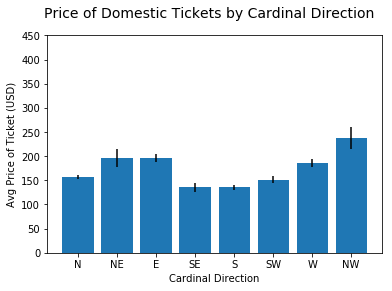

In [40]:
# Visualize ticket cost average
coords=range(8)

plt.bar(range(8),dompriceavgs['Price (USD)'],tick_label=compassindex,yerr=pricesems['Price (USD)'])
plt.ylabel('Avg Price of Ticket (USD)')
plt.ylim([0,450])
plt.xlabel('Cardinal Direction')
plt.suptitle('Price of Domestic Tickets by Cardinal Direction', fontsize=14)

plt.savefig('Figures/Avg Dom Price by Direction.png')

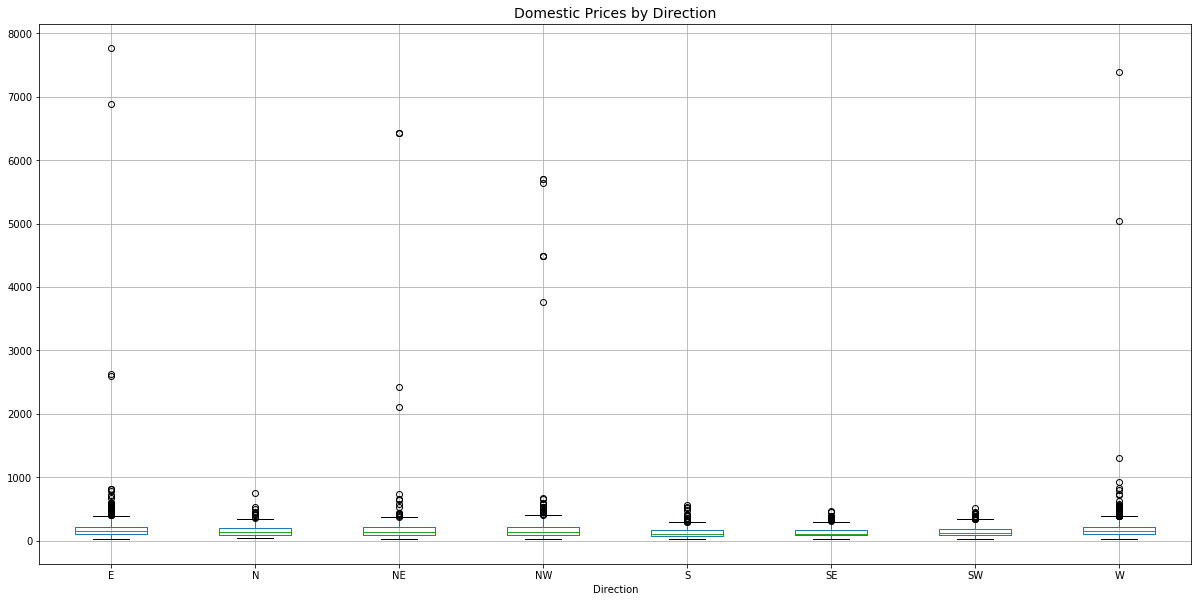

In [43]:
domcoordprices.boxplot('Price (USD)', by='Direction',figsize=(20,10))
plt.title('Domestic Prices by Direction',fontsize=14)
plt.suptitle("")

plt.savefig('Figures/Domestic Prices by direction Boxplot.png')

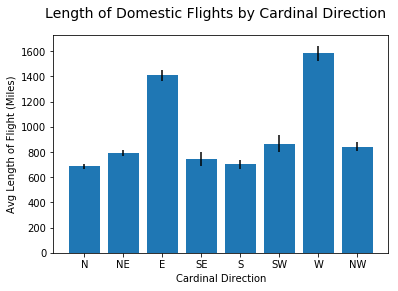

In [33]:
# Visualize Length of Domestic Flights by Direction
coords=range(8)

plt.bar(range(8),dompriceavgs['Distance (Miles)'],tick_label=compassindex,yerr=pricesems['Distance (Miles)'])
plt.ylabel('Avg Length of Flight (Miles)')
plt.xlabel('Cardinal Direction')
plt.suptitle('Length of Domestic Flights by Cardinal Direction', fontsize=14)

plt.savefig('Figures/Avg Dom Flight Length by Direction.png')

In [34]:
maxlength=domcoordprices['Distance (Miles)'].max()
domcoordprices[domcoordprices['Distance (Miles)']==maxlength]

,Origin,Destination,Purchase Time,Distance (Miles),Departure Date,Price (USD),Class,Purchase Gate,lat1,long1,lat2,long2,Bearing,Direction
1931,BOS,HNL,2018-10-02T19:16:19,5088,2018-11-17,440.89,0,Kiwi.com,42.3643,-71.005203,21.32062,-157.924228,256.390189,W


In [37]:
maxprice=domcoordprices['Price (USD)'].max()
domcoordprices[domcoordprices['Price (USD)']==maxprice]

,Origin,Destination,Purchase Time,Distance (Miles),Departure Date,Price (USD),Class,Purchase Gate,lat1,long1,lat2,long2,Bearing,Direction
10314,MDW,JST,2018-10-06T05:45:40,470,2018-10-14,7762.39,0,JustFly,41.785999,-87.752403,40.316101,-78.8339,99.359036,E
